To fit the exported UV melting files, QC, append data to a standard format table, and make analysis plots.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import os, json
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import warnings
warnings.filterwarnings("ignore")
from nnn.uv import *

In [3]:
%run nnn/ipynb_init.py

In [4]:
datadir = '/mnt/d/data/nnn/ECLExport'
data_list = [fn for fn in absolute_file_paths(datadir) if fn.endswith('.csv')]

In [13]:
# summary_table = pd.read_table('/mnt/d/data/nnn/SummaryUVMeltingExperiments.tsv')
# summary_table = summary_table.query('Usable').drop(columns=['ProtocolID','Usable','PrepareFresh'])
# summary_table['DateCompleted'] = summary_table['DateCompleted'].apply(lambda x: ''.join(x.split('-'))[2:])

DateCompleted                        Description  \
0         220526                   SL001_1M-Na_test   
2         220712     WC2378_hairpin_1M-Na_conc_test   
3         220727       WC68_hairpin_1M-Na_conc_test   
4         220809            WC_batch1_hairpin_1M-Na   
5         220828          WC_batch1_hairpin_50mM-Na   
8         220904          WC_batch1_hairpin_25mM-Na   
9         220908          WC_batch2_hairpin_25mM-Na   
13        221013  WC1025_duplex_25mM-Na_higher_conc   

                                                Oligo OligoConcentrationuM  \
0                                               SL001            4,2,1,0.5   
2                                              WC2378   128,64,32,16,8,4,2   
3                                                WC68      1,2,4,5,8,10,12   
4      WC1106,WC1048,WC1394,WC200,WC578,WC1025,WC1154                  6.4   
5       WC1048,WC1394,WC200,WC578,WC1025,WC1154,WC788                  6.4   
8       WC1048,WC1394,WC200,WC578,WC1025,WC1154,WC788                  3.2   
9       WC788,WC1432,WC1203,WC2922,WC91,WC2119,WC2215                  3.2   
13  WC1025_stem,WC1025_stem,WC1025_stem,WC1025_spl...    48,72,96,48,72,96   

    NaConcmM  SnapFreeze  Blank  NumberOfCycles  MinTemperature  \
0       1000       False  False               2               5   
2       1000       False  False               2               5   
3       1000       False  False               2               5   
4       1000       False  False               2               5   
5         50        True   True               2              12   
8         25        True   True               2              12   
9         25        True   True               3              12   
13        25       False  False               2               1   

    MaxTemperature                                             Result  
0               95                                   First 2 are good  
2               95                              Those <=16uM are good  
3               95                                               Good  
4               95                                             Great!  
5               85             Some curves look funny but mostly fine  
8               85                                          OK to use  
9               85  Only some of the first melt curves were usable...  
13              45  Only the 72uM stem one works perfectly. The 48...

In [19]:
summary_table = pd.read_csv('/mnt/d/data/nnn/SummaryUVMeltingExperimentsModified.csv', index_col=0)

In [20]:
"""
Transfer into long form sample sheet
"""

sample_columns = ['curve_date', 'curve_num', 'SEQID', 'conc_uM', 'Na_mM', 'celsius_min', 'celsius_max']
sample_df = pd.DataFrame(columns=sample_columns)

for i,row in summary_table.iterrows():

    oligo_list = row['Oligo'].split(',')
    conc_list = row['OligoConcentrationuM'].split(',')
    n = max(len(oligo_list), len(conc_list))
    if len(oligo_list) == 1:
        oligo_list = [oligo_list[0] for _ in range(n)]
    if len(conc_list) == 1:
        conc_list = [conc_list[0] for _ in range(n)]
    
    if n > 1:
        for i in range(n):
            sample_dict = dict(curve_date=row['DateCompleted'],
                               curve_num=str(i+1),
                               SEQID=oligo_list[i],
                               conc_uM=conc_list[i],
                               Na_mM=row['NaConcmM'],
                               celsius_min=row['celsiusMin'],
                               celsius_max=row['celsiusMax']
                              )
            
            sample_df = pd.concat((sample_df, pd.DataFrame(pd.Series(sample_dict)).T),
                                  ignore_index=True)

sample_df.curve_date = sample_df.curve_date.astype(str)
sample_df.curve_num = sample_df.curve_num.astype(str)
sample_df.to_csv('/mnt/d/data/nnn/UVMeltingSampleSheet.csv')

## uv.py

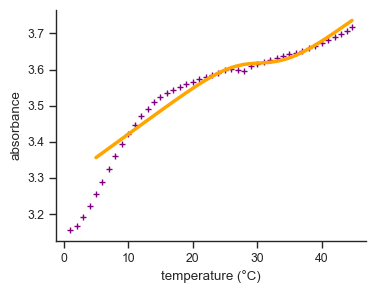

In [11]:
curve = read_curve(fn)
out = fit_param_direct(curve)
out

In [ ]:
out

220526_2_MeltingCurve
	Done!


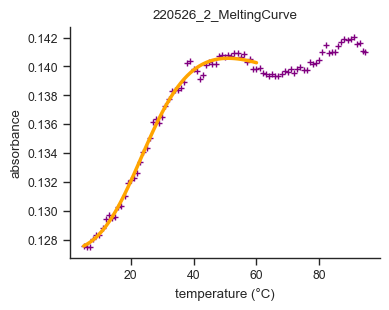

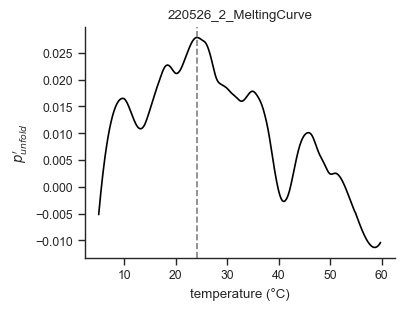

In [32]:
fn = '/mnt/d/data/nnn/ECLExport/220526_SL001_1M-Na_test/2_MeltingCurve.csv'
result_dict = fit_curve(fn, figdir=os.path.join(datadir, 'fig'), celsius_max=60)

In [286]:
result_df.append(result_dict, ignore_index=True)

curve_date curve_num    curve_name     dH_fit  dH_fit_std    Tm_fit  \
0     220526         1  CoolingCurve -30.368495    0.677792  27.01489   

   Tm_fit_std  fmax_fit  fmax_fit_std  fmin_fit  fmin_fit_std  slope_fit  \
0    0.065785  0.309977      0.000802  0.280776      0.000083   0.000161   

   slope_fit_std    Tm         dH        dS     dG_37 celsius_min celsius_max  
0       0.000014  24.1 -34.119267 -0.114783  1.480702         NaN          60

220526_1_CoolingCurve
	Done!
220526_1_MeltingCurve
	Done!
Trouble with /mnt/d/data/nnn/ECLExport/220526_SL001_1M-Na_test/1_SecondaryCoolingCurve.csv
Trouble with /mnt/d/data/nnn/ECLExport/220526_SL001_1M-Na_test/1_SecondaryMeltingCurve.csv
220526_2_CoolingCurve
	Done!
220526_2_MeltingCurve
	Done!
Trouble with /mnt/d/data/nnn/ECLExport/220526_SL001_1M-Na_test/2_SecondaryCoolingCurve.csv
Trouble with /mnt/d/data/nnn/ECLExport/220526_SL001_1M-Na_test/2_SecondaryMeltingCurve.csv
220712_4_CoolingCurve
	Done!
220712_4_MeltingCurve
	Done!
220712_4_SecondaryCoolingCurve
	Done!
220712_4_SecondaryMeltingCurve
	Done!
220712_5_CoolingCurve
	Done!
220712_5_MeltingCurve
	Done!
220712_5_SecondaryCoolingCurve
	Done!
220712_5_SecondaryMeltingCurve
	Done!
220712_6_CoolingCurve
	Done!
220712_6_MeltingCurve
	Done!
220712_6_SecondaryCoolingCurve
	Done!
220712_6_SecondaryMeltingCurve
	Done!
220712_7_CoolingCurve
	Done!
220712_7_MeltingCurve
	Done!
220712_7_SecondaryCoolingCurve
	Done!
220712_7_SecondaryMelt

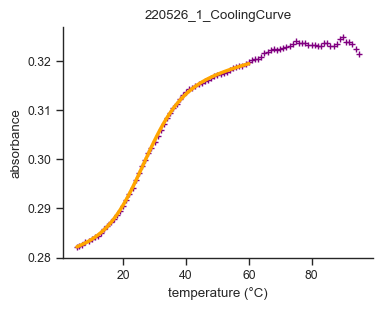

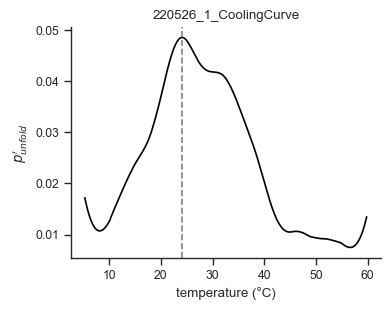

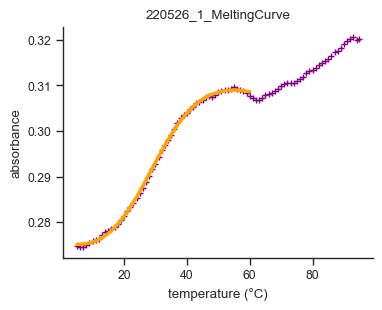

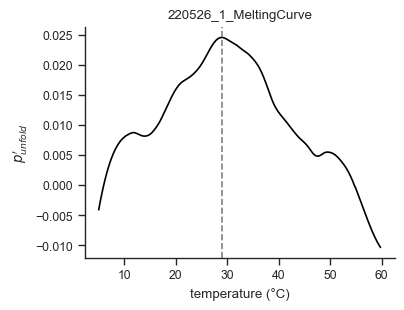

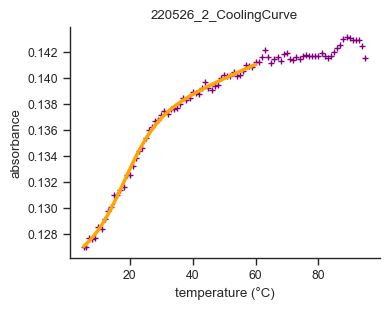

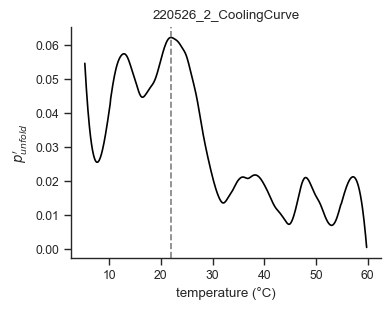

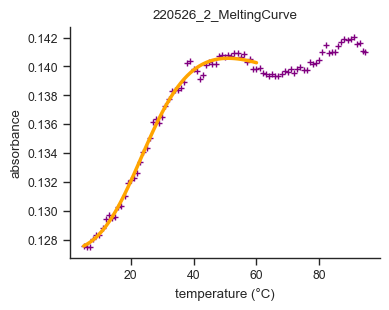

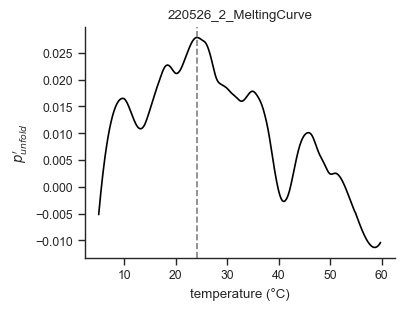

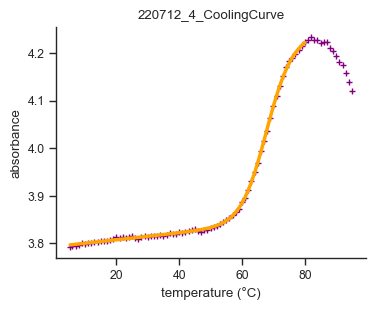

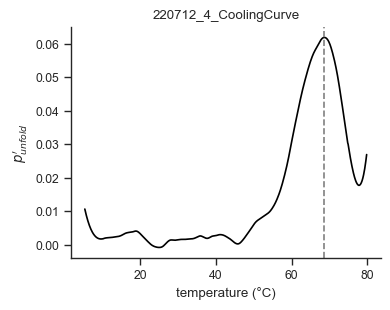

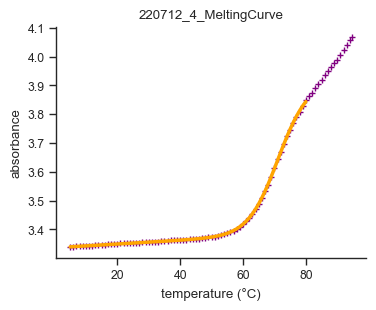

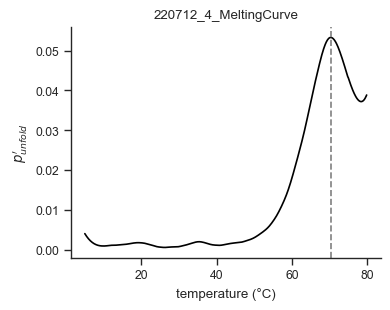

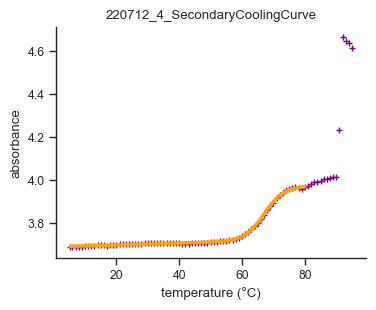

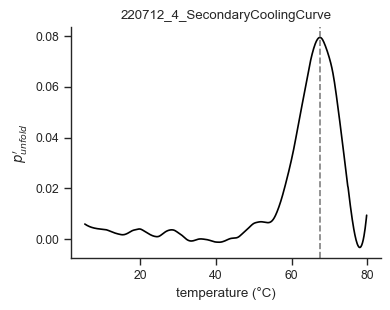

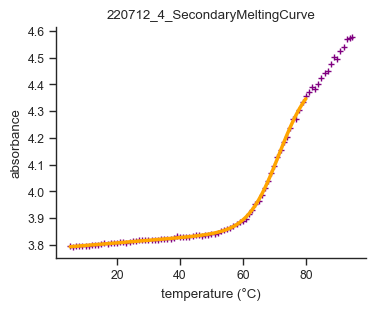

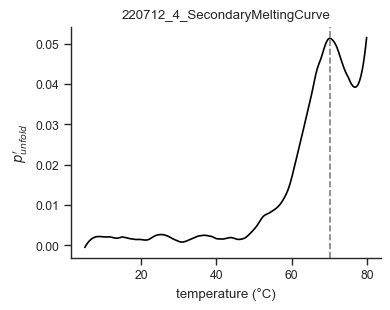

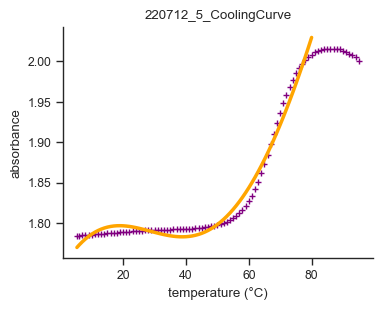

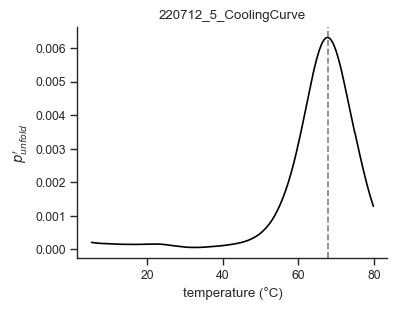

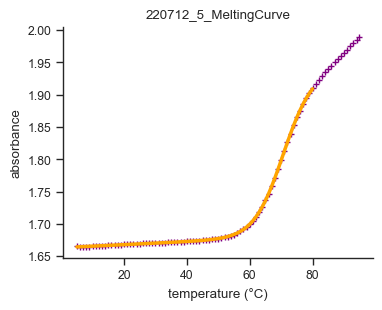

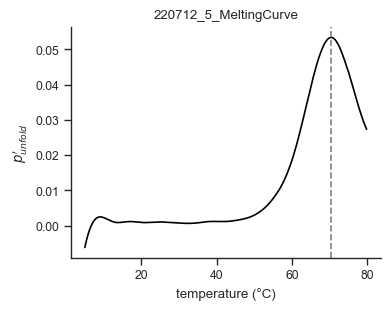

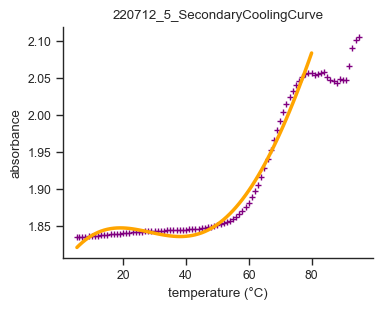

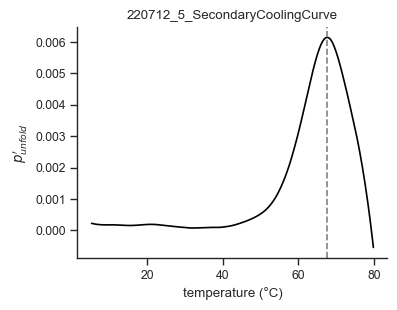

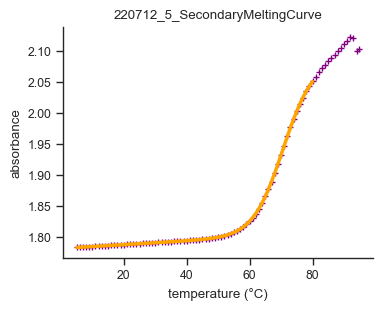

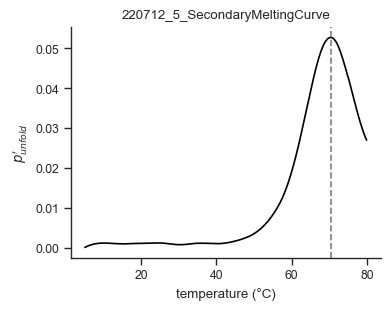

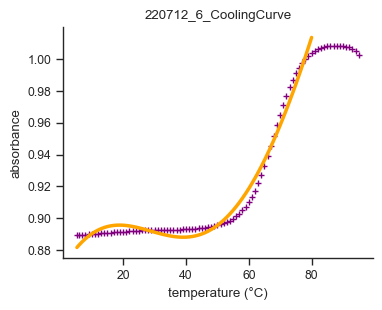

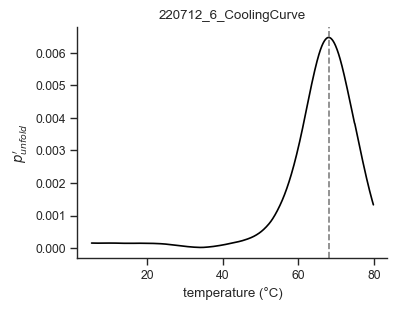

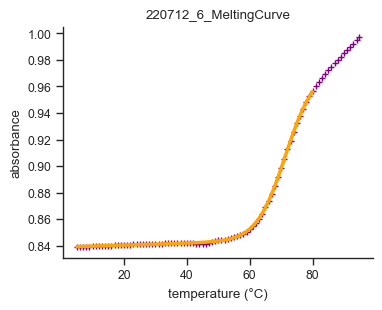

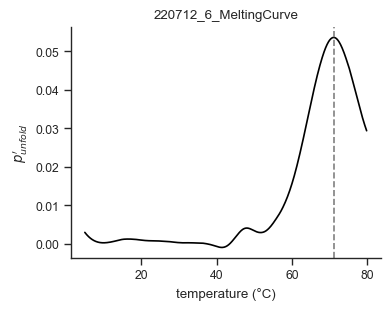

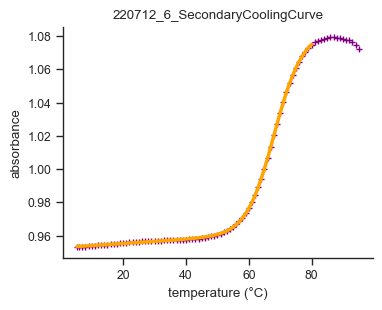

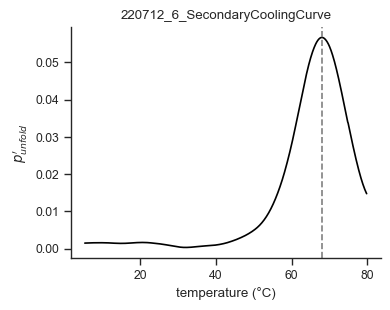

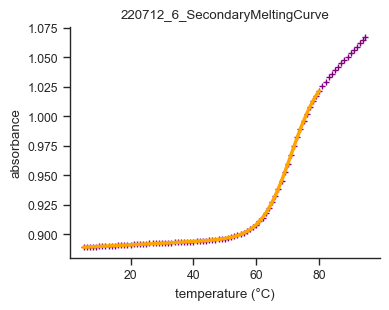

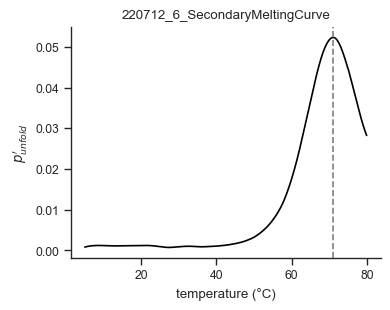

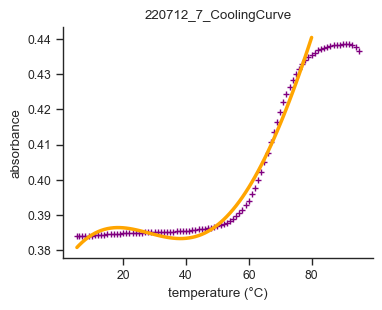

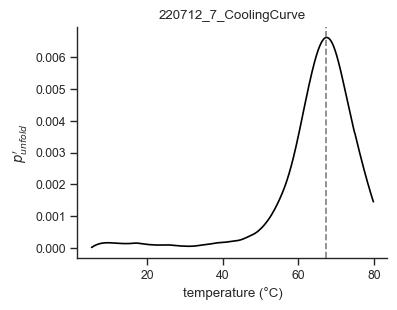

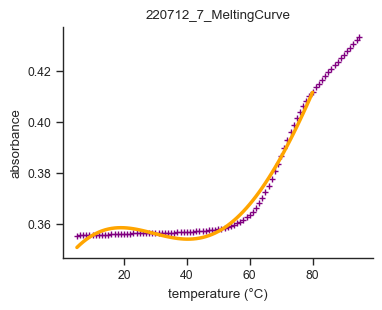

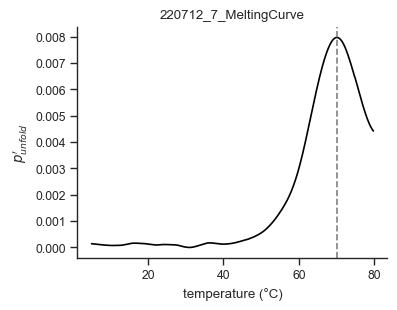

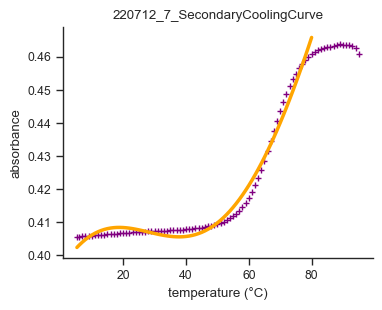

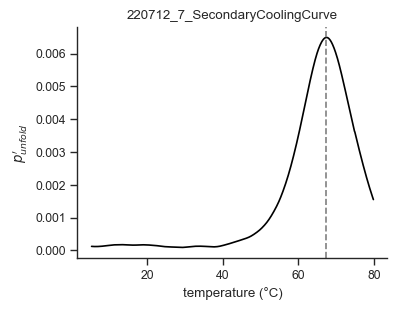

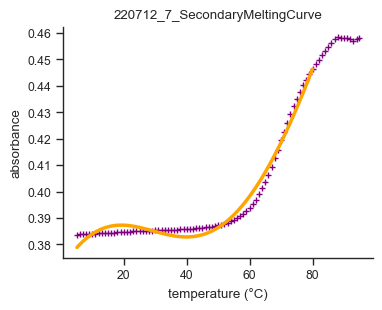

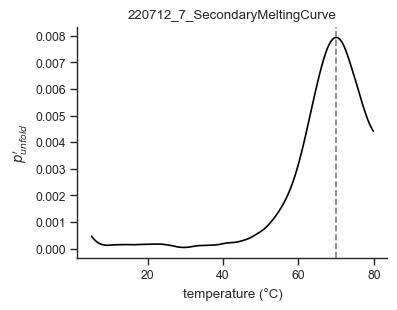

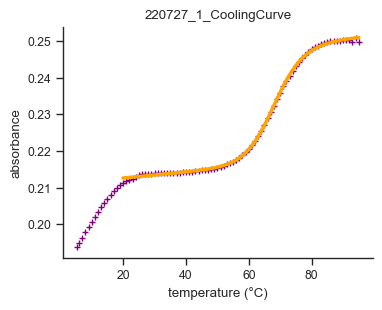

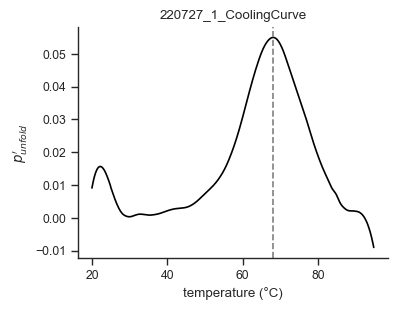

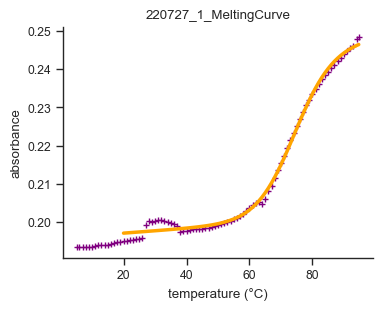

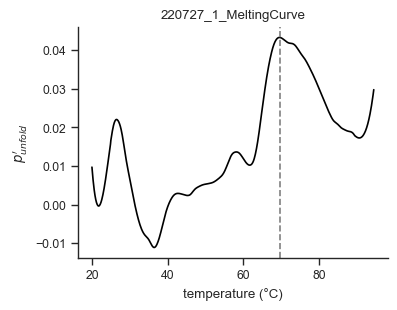

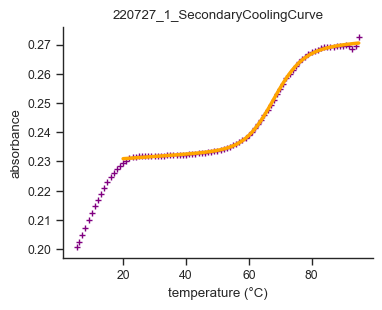

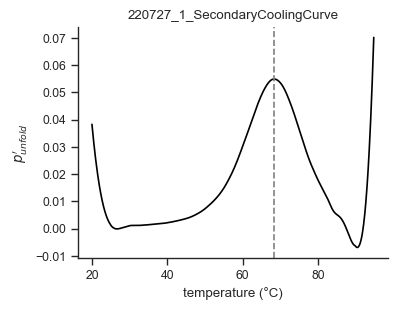

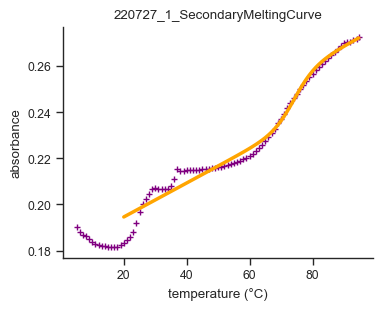

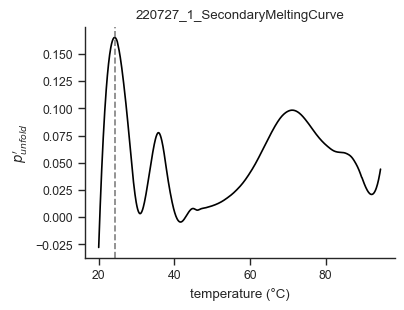

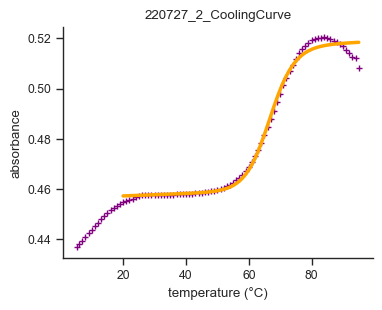

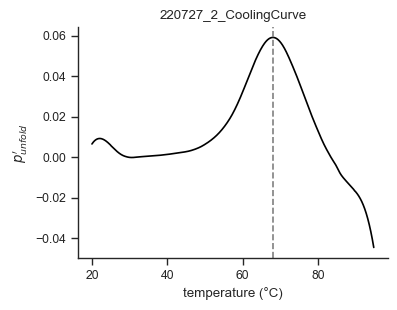

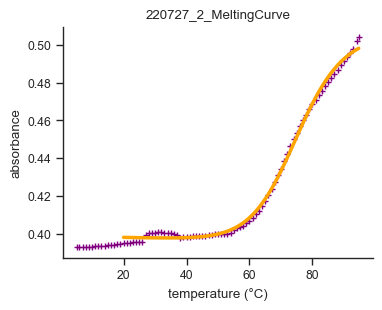

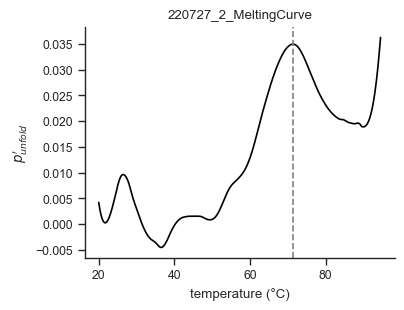

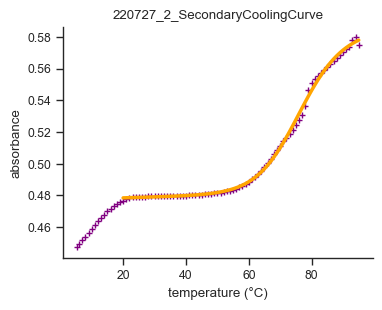

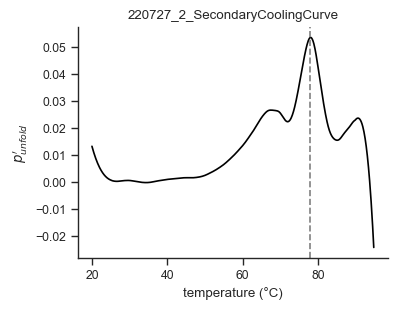

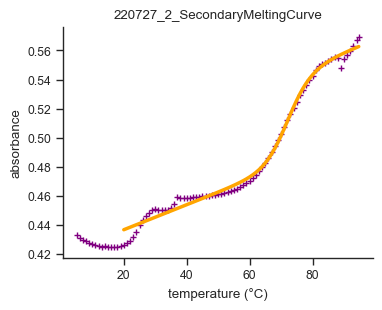

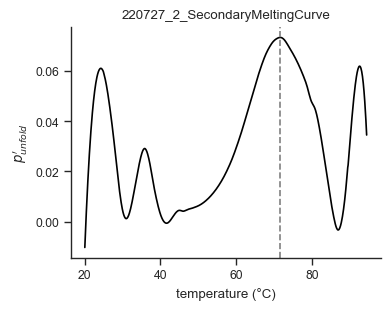

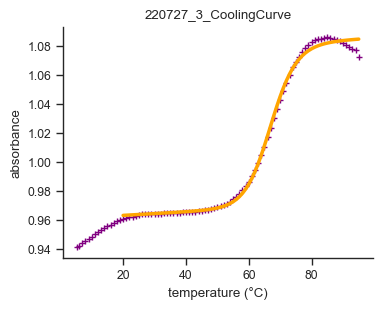

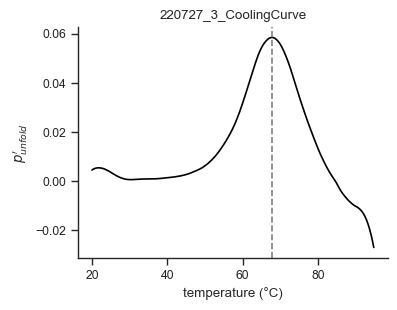

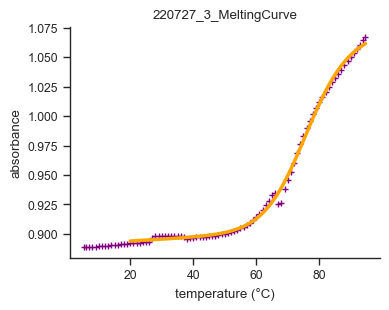

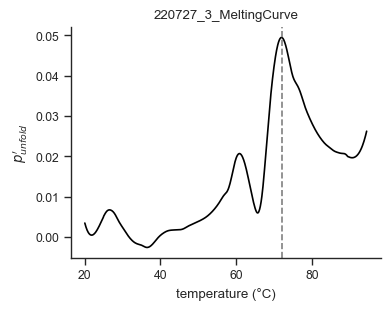

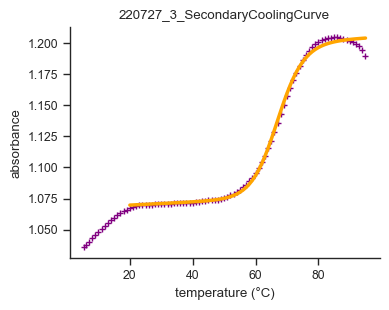

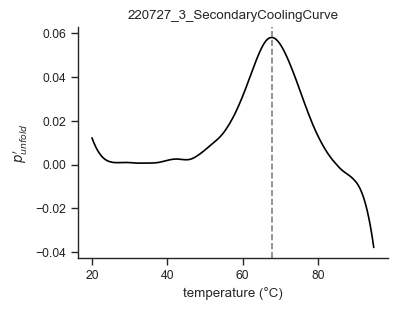

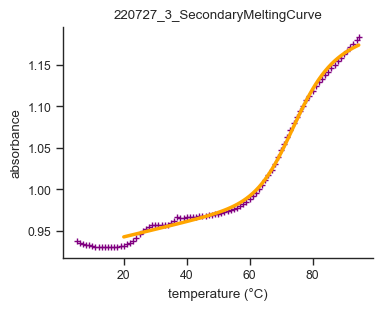

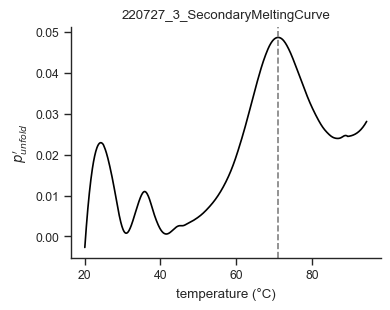

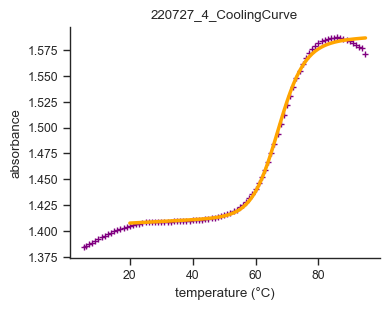

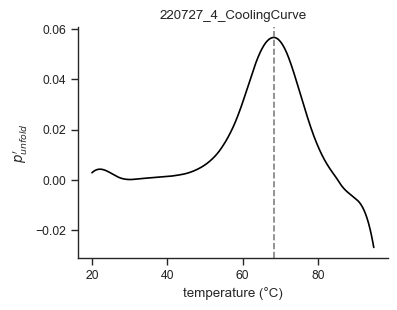

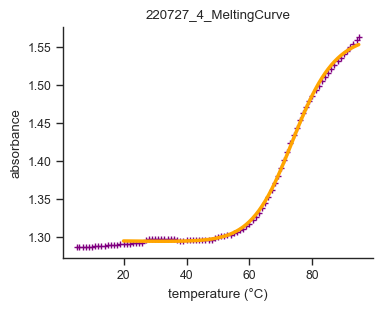

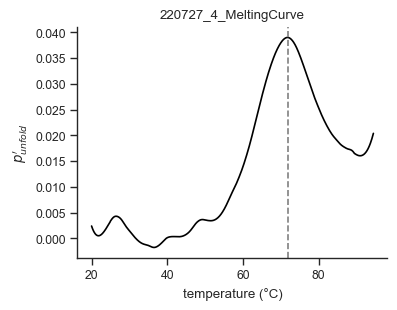

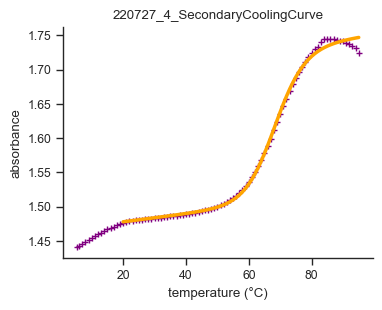

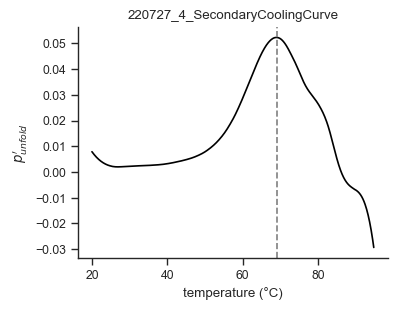

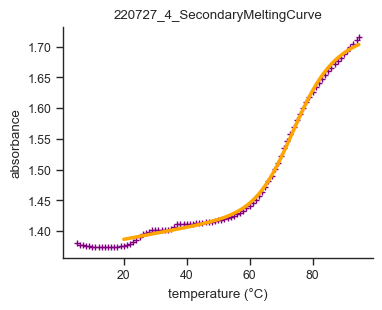

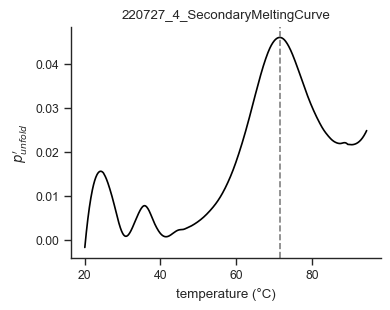

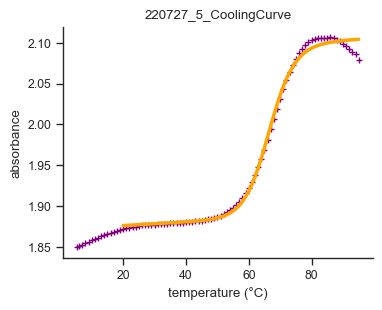

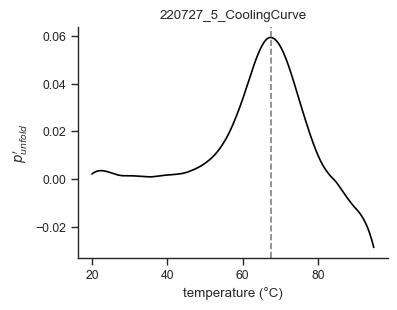

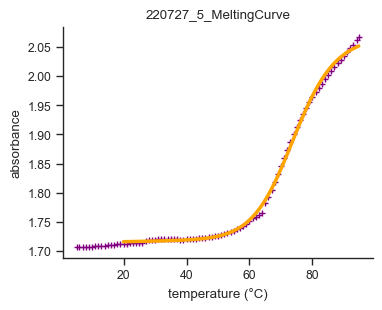

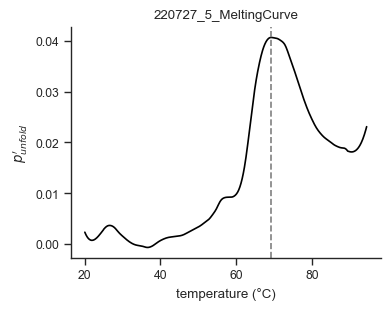

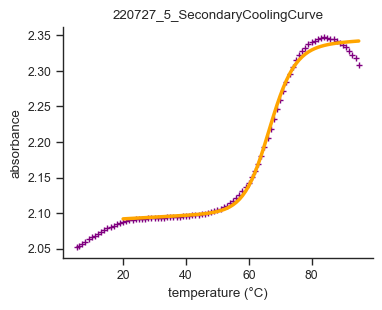

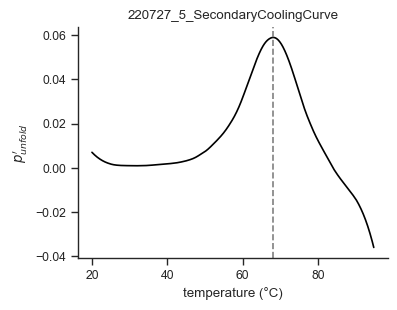

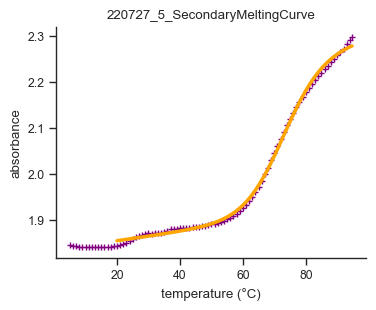

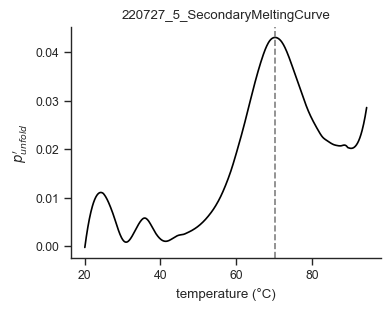

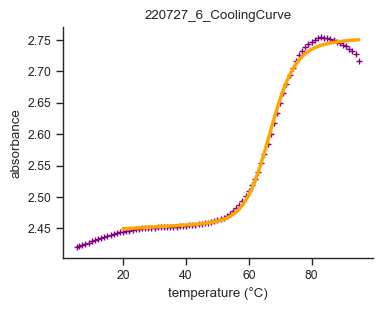

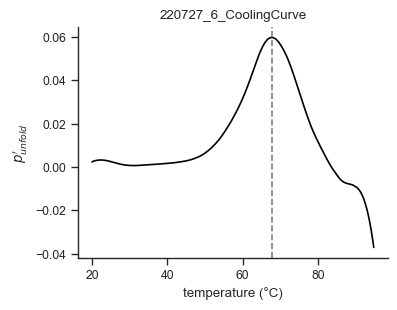

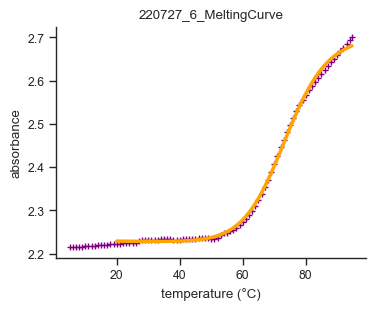

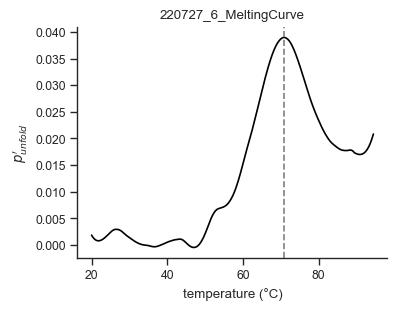

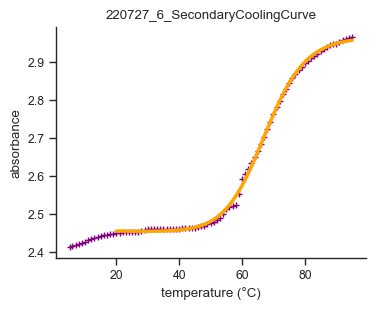

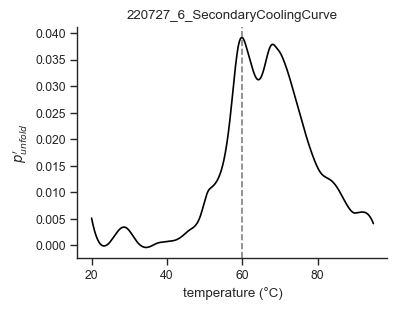

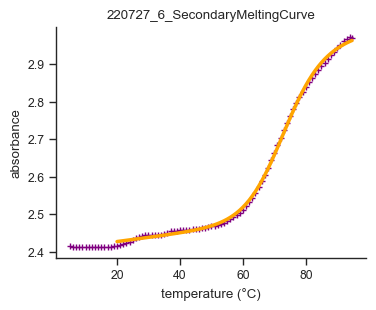

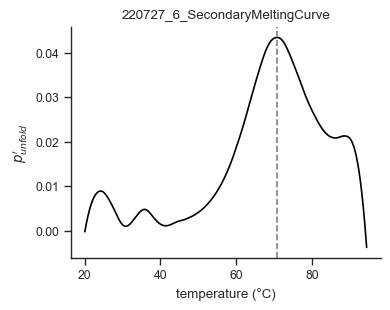

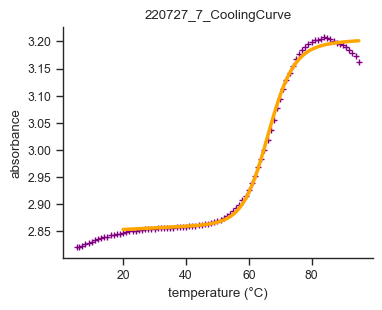

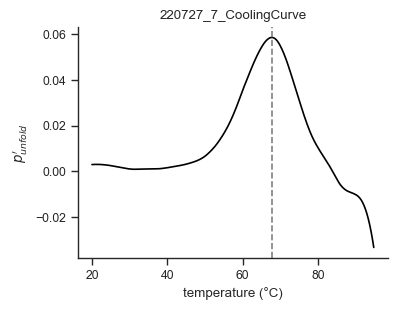

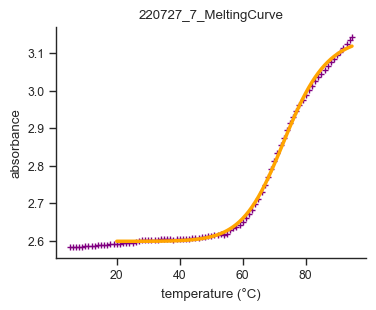

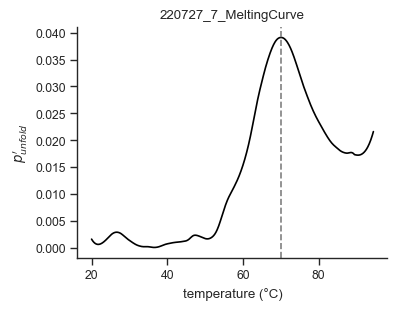

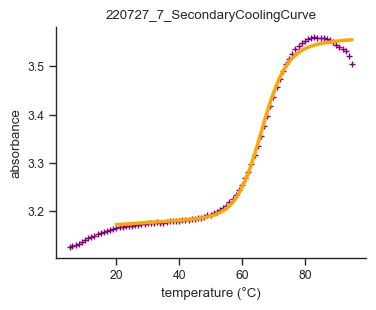

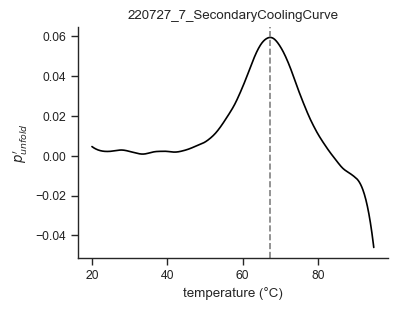

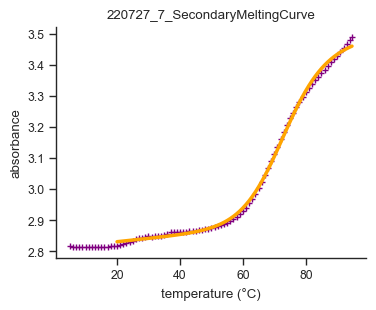

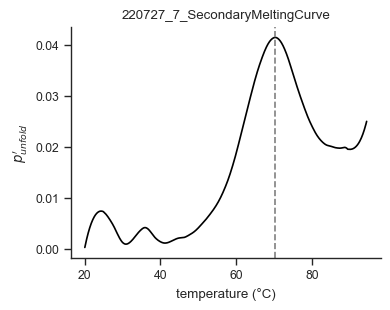

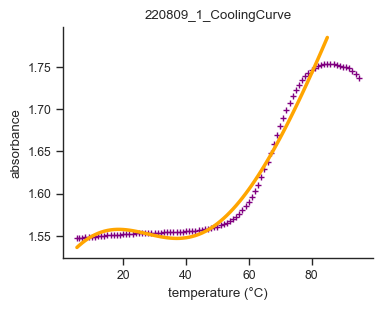

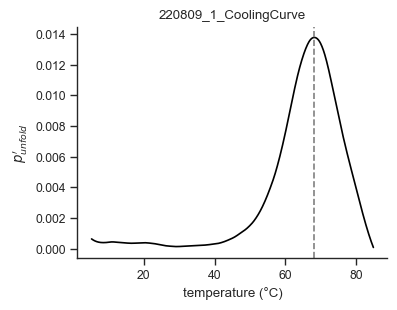

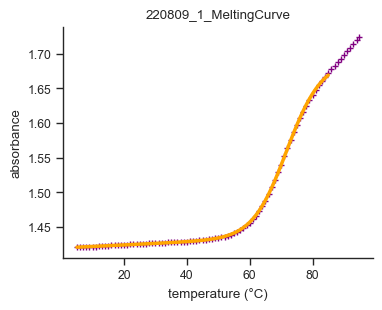

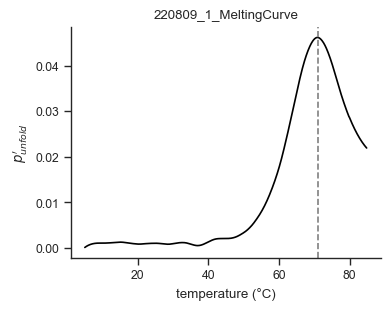

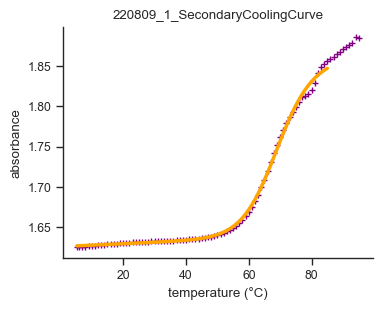

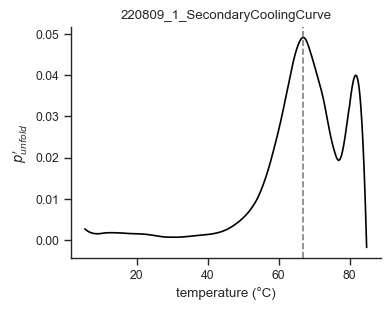

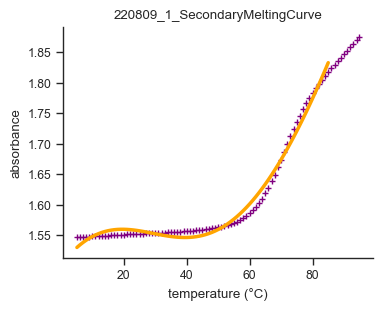

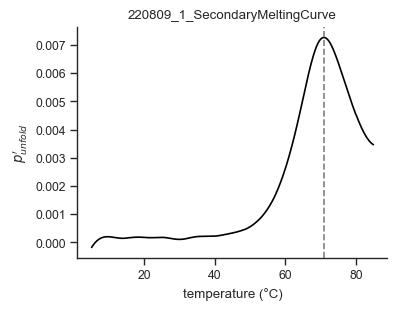

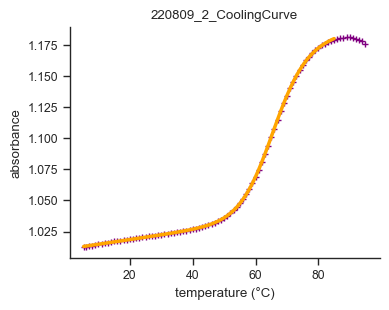

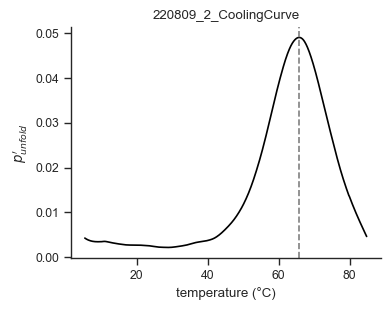

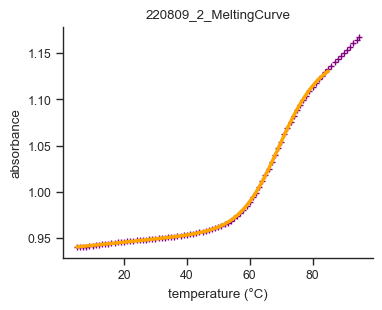

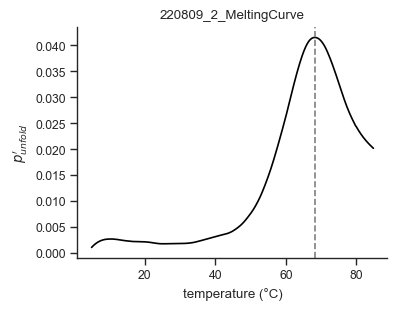

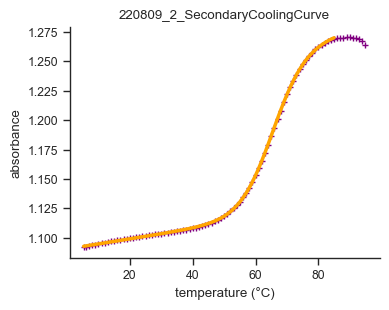

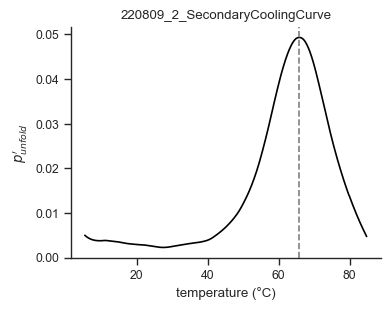

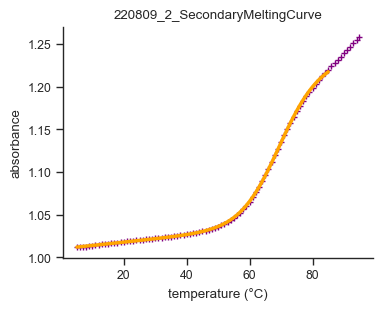

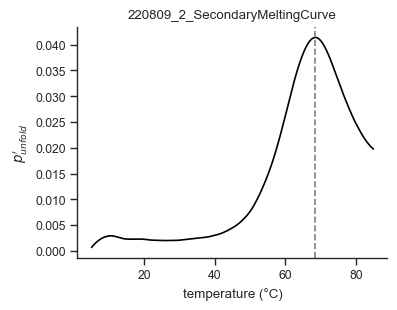

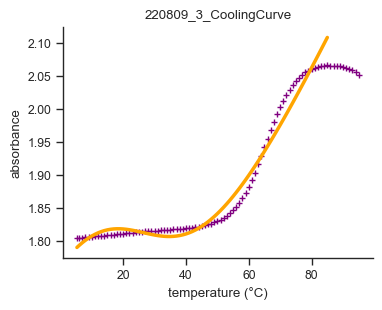

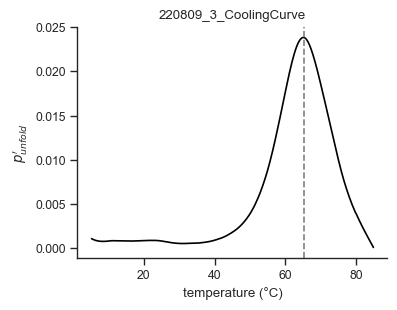

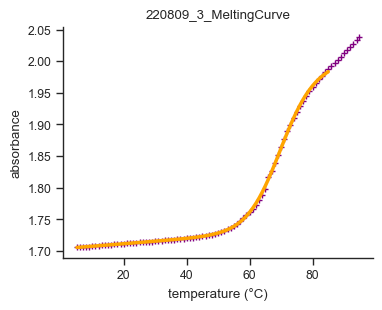

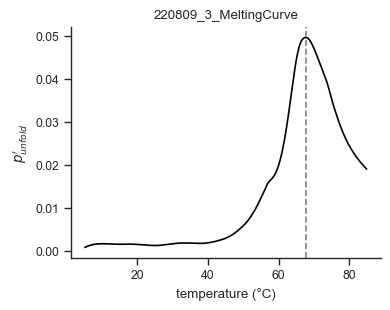

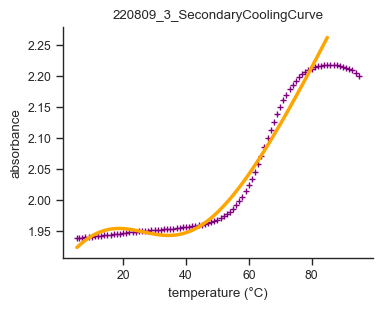

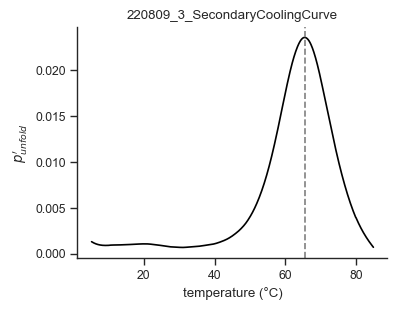

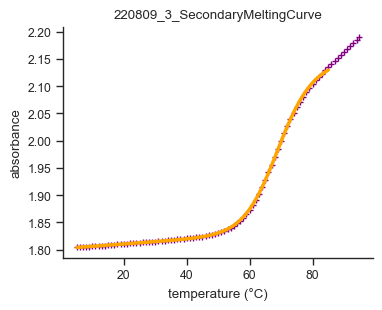

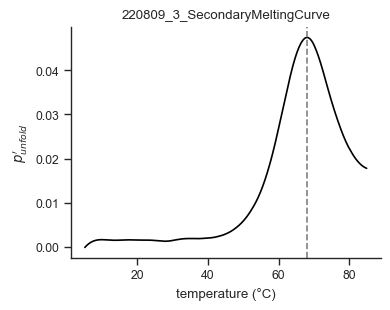

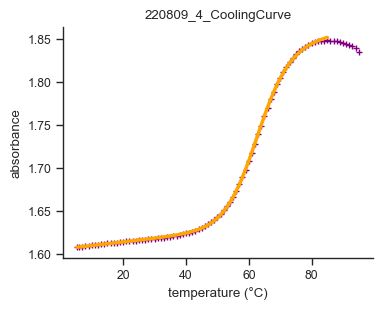

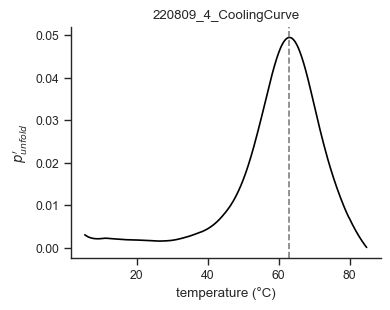

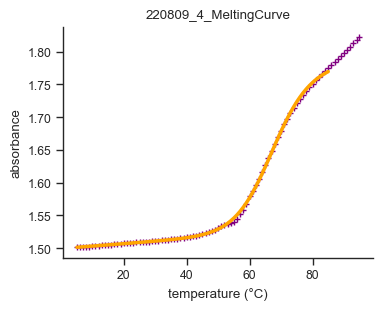

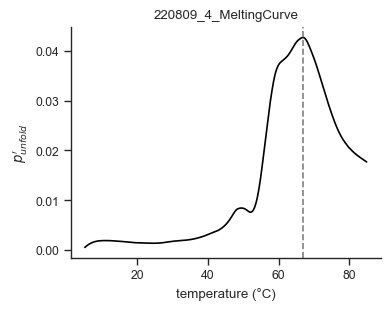

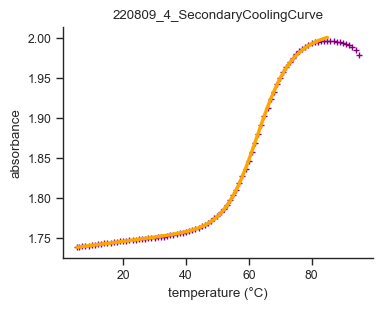

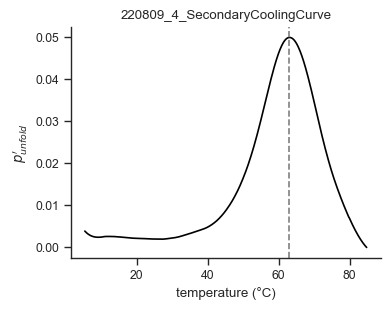

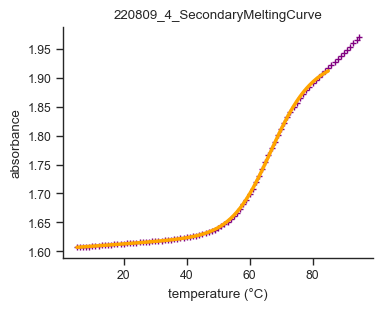

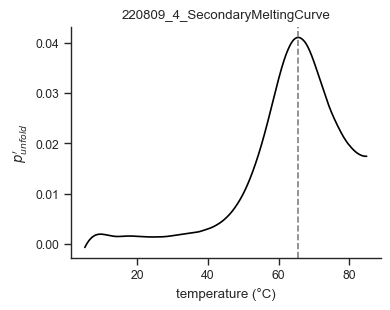

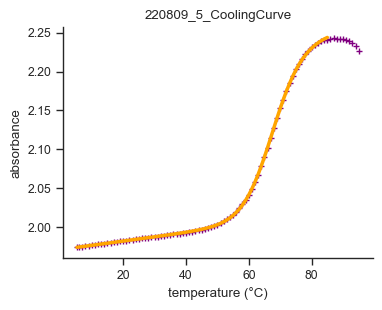

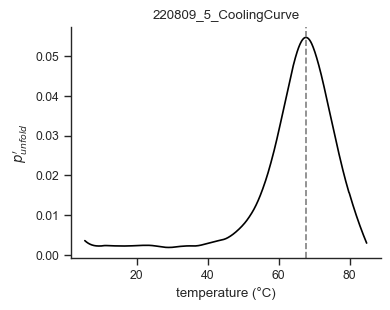

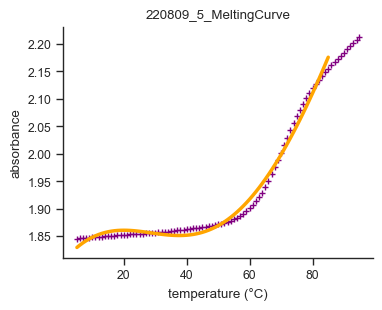

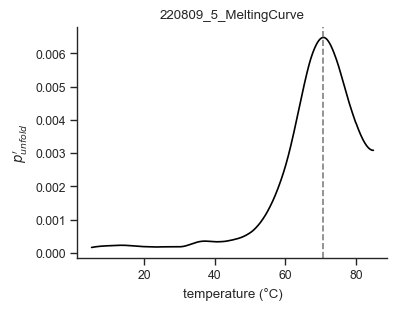

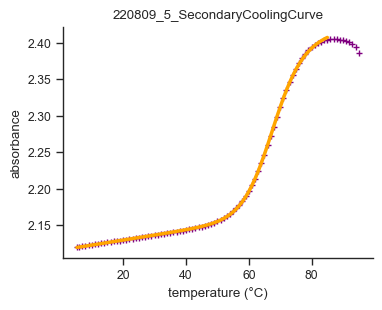

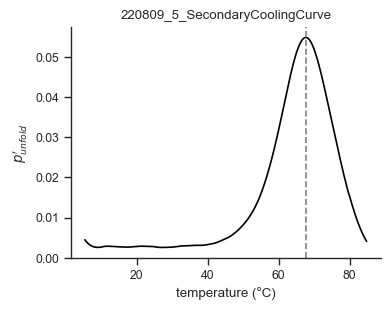

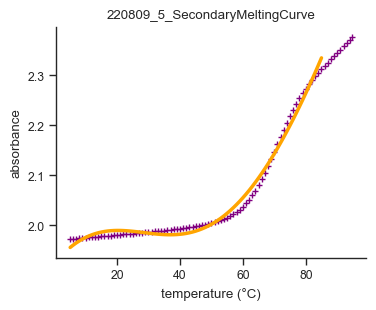

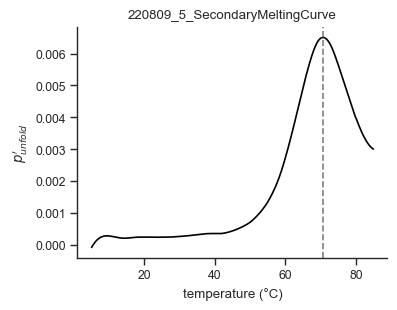

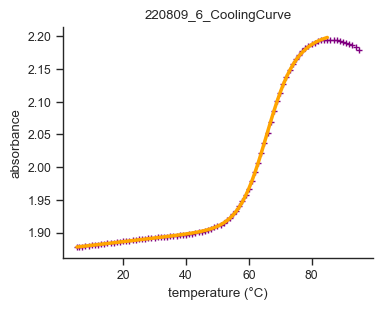

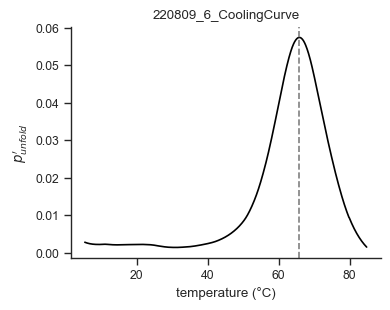

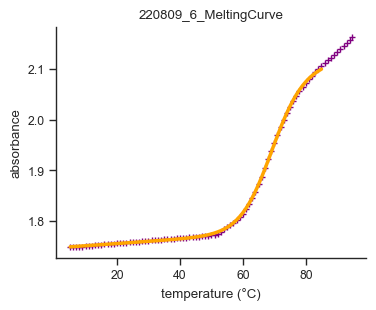

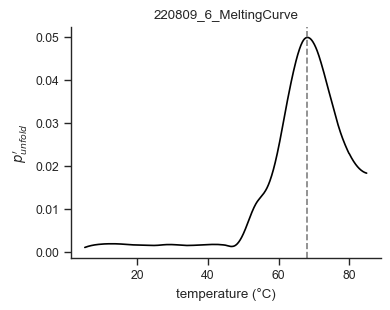

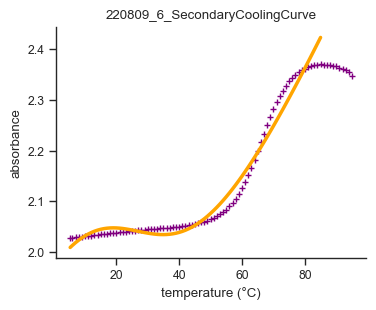

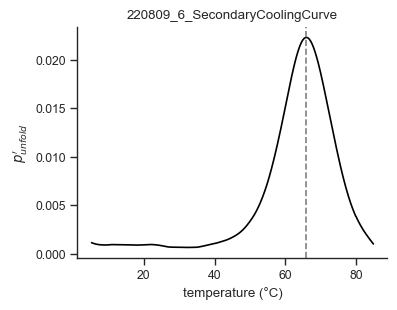

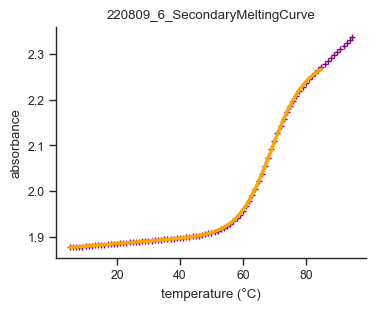

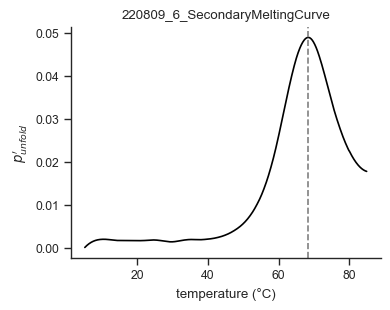

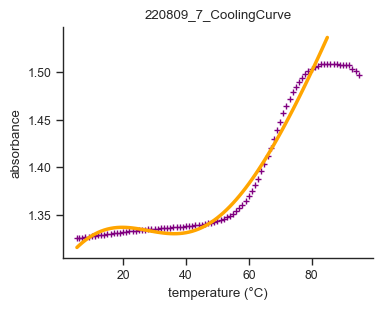

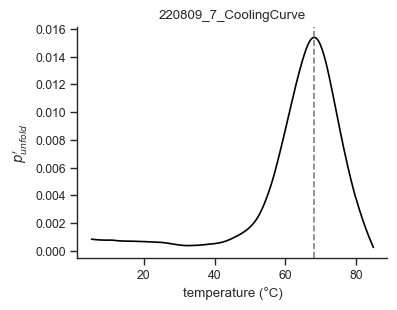

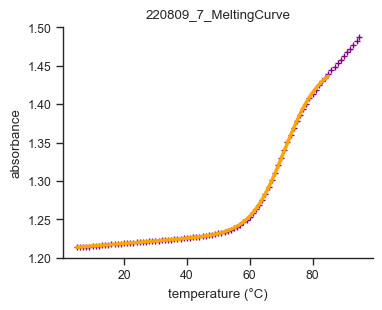

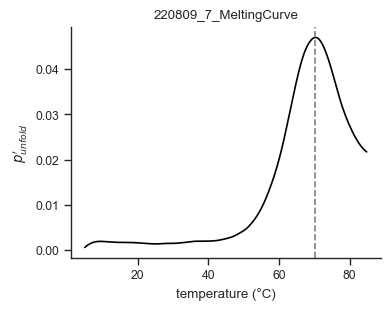

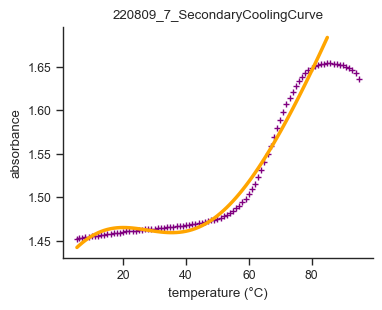

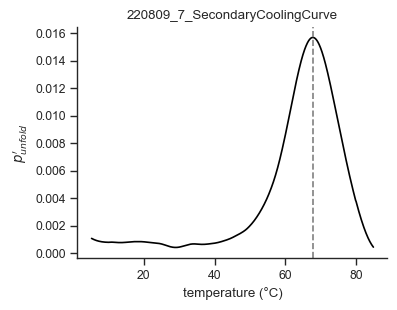

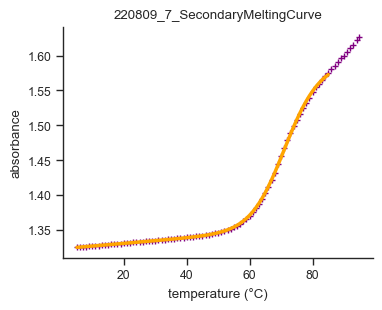

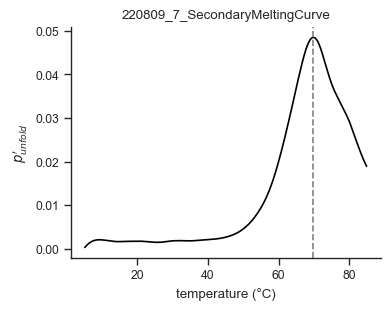

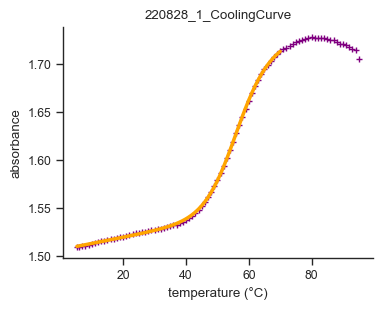

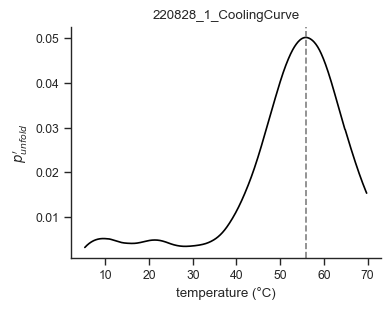

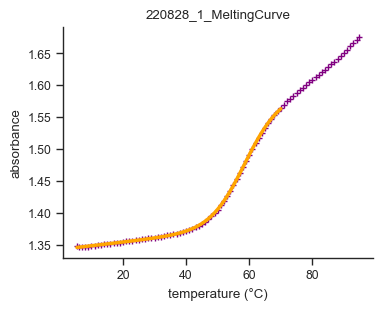

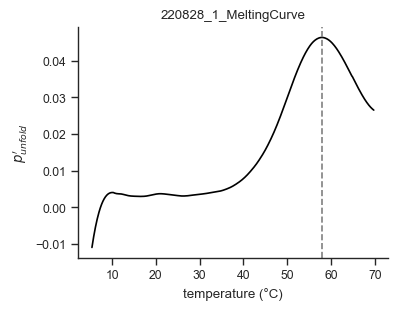

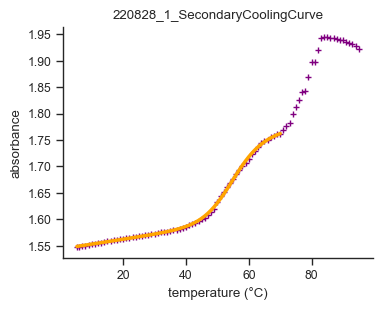

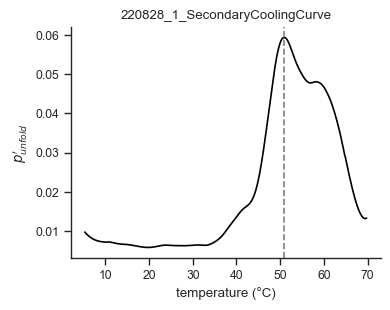

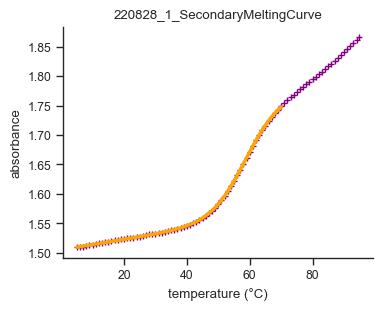

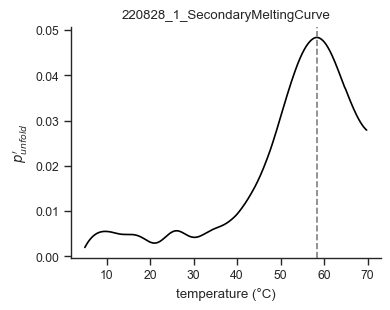

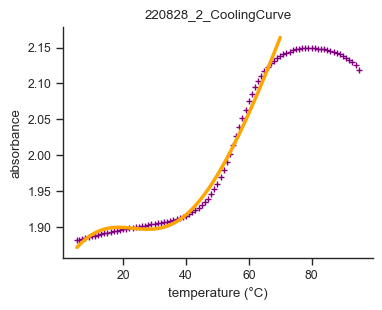

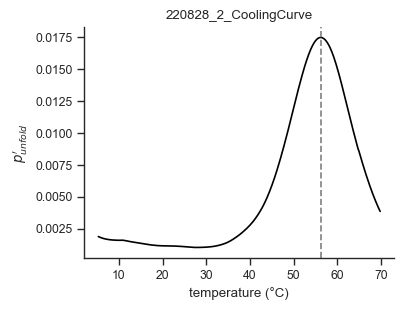

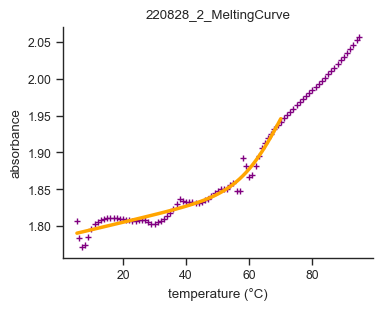

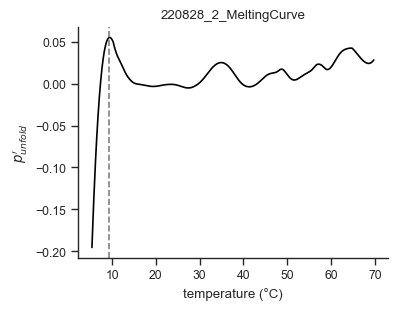

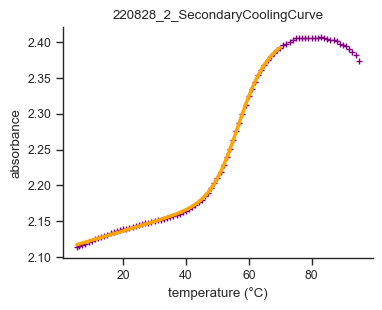

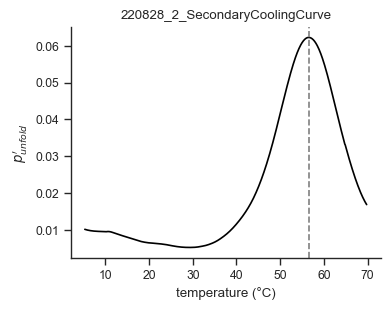

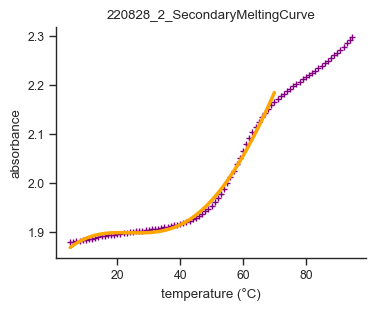

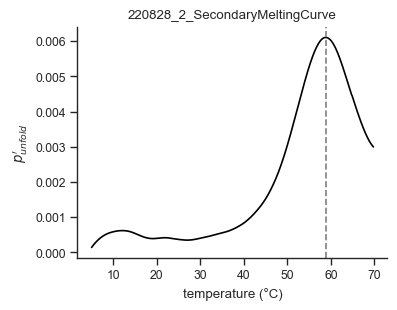

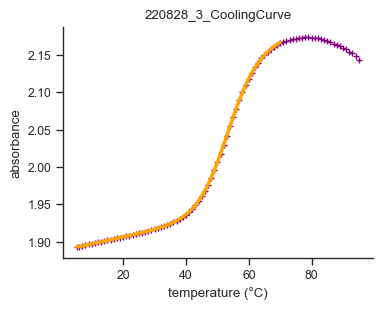

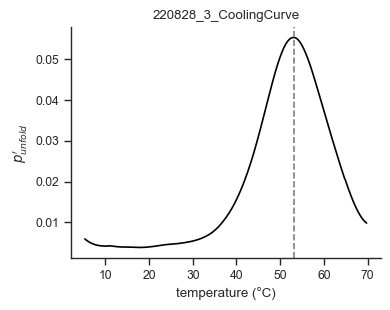

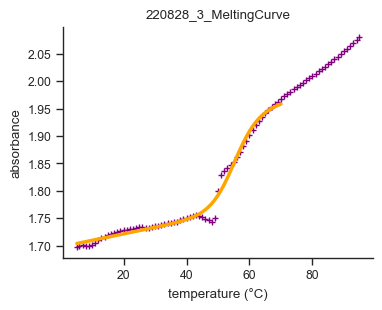

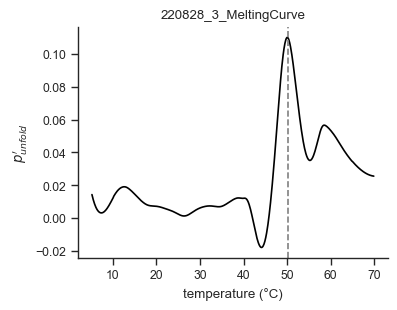

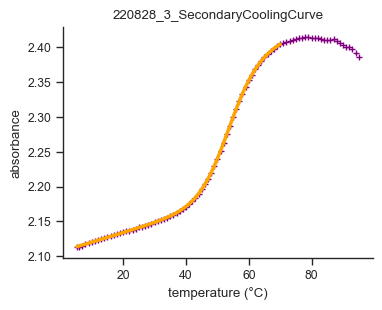

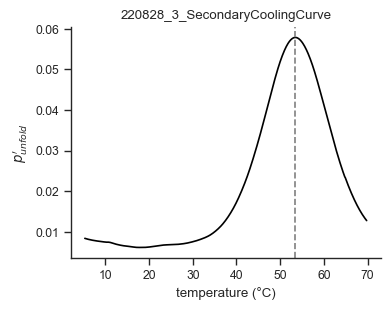

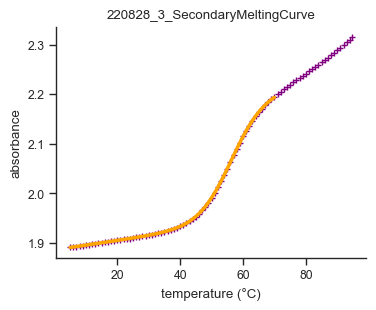

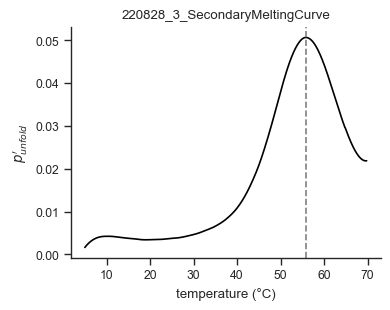

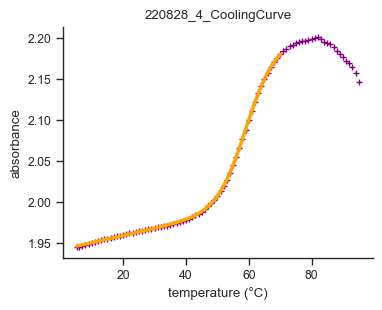

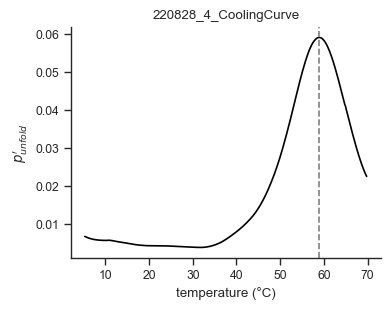

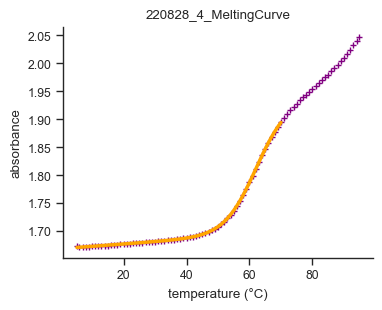

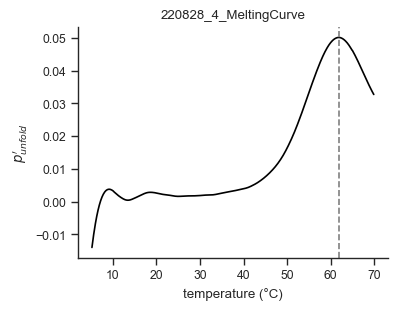

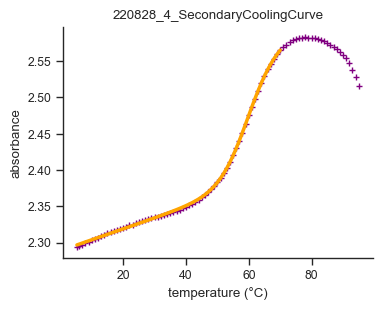

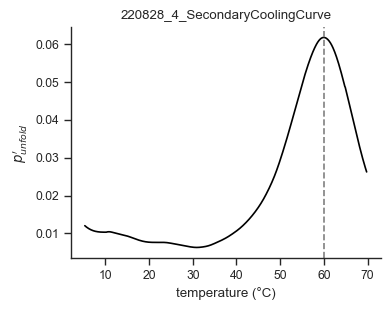

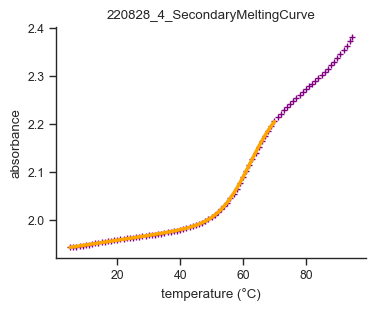

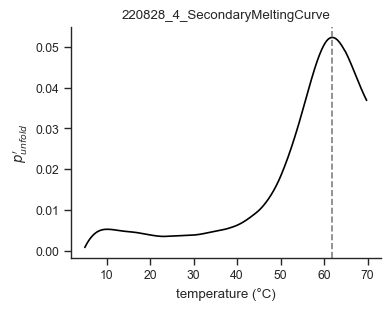

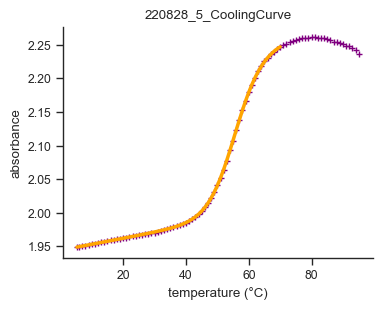

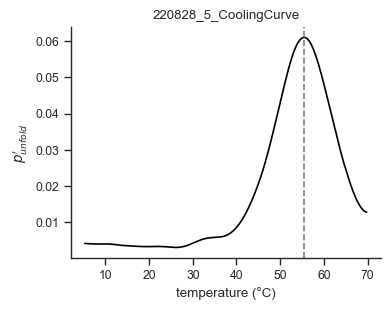

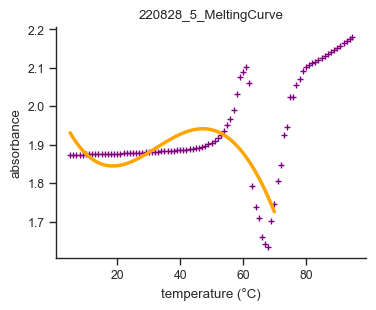

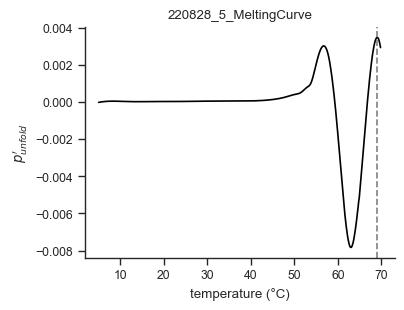

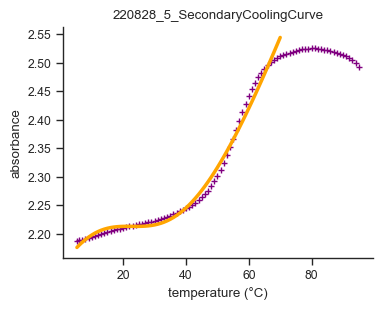

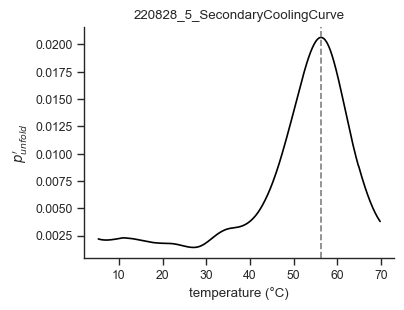

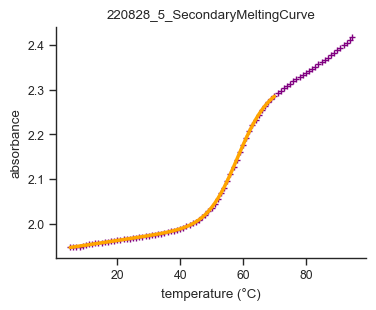

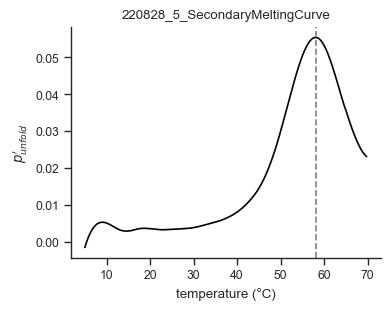

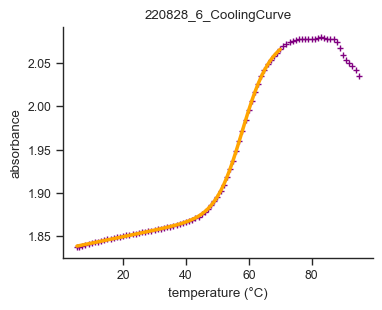

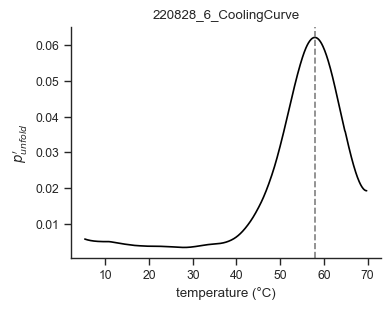

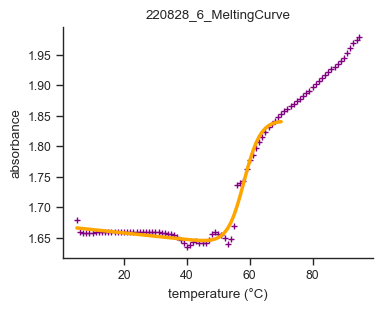

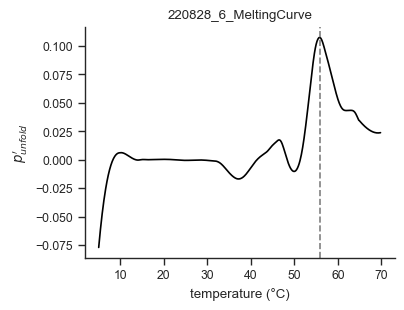

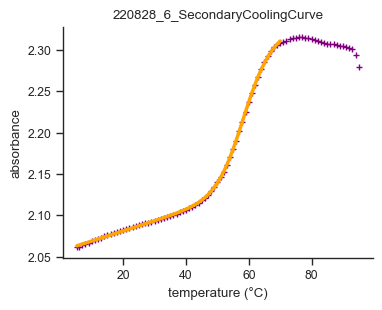

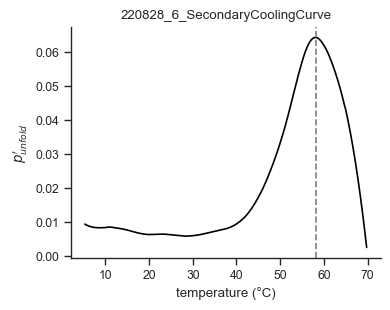

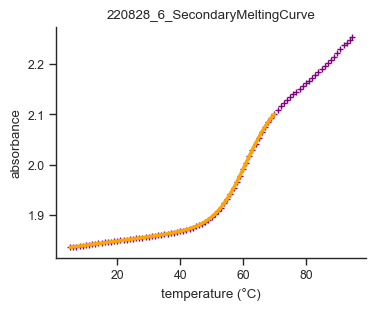

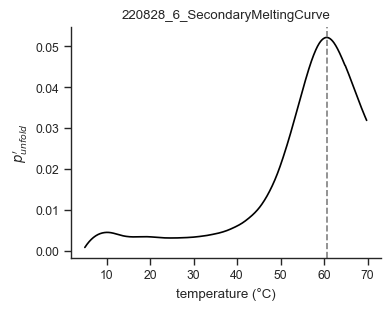

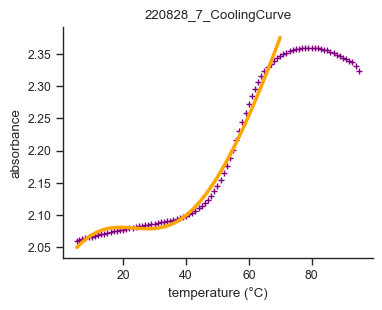

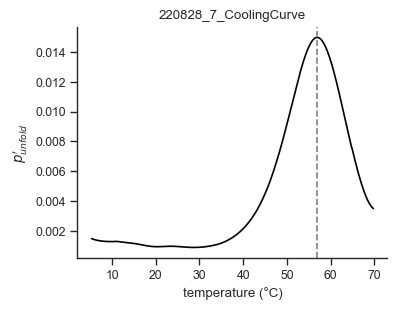

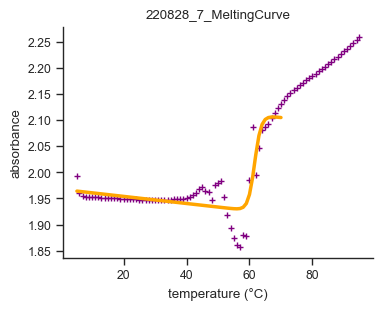

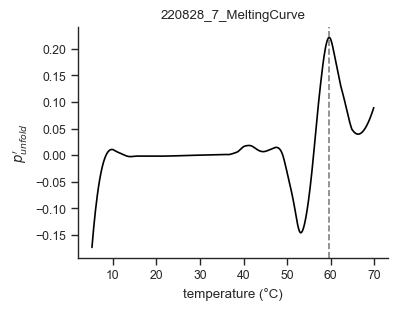

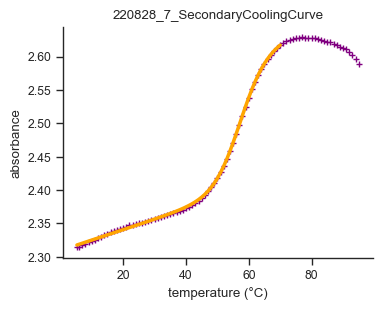

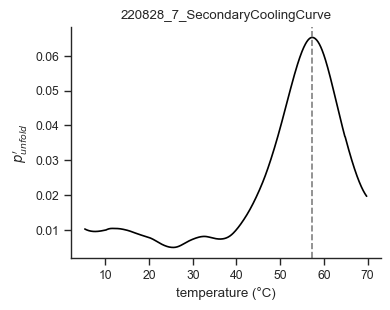

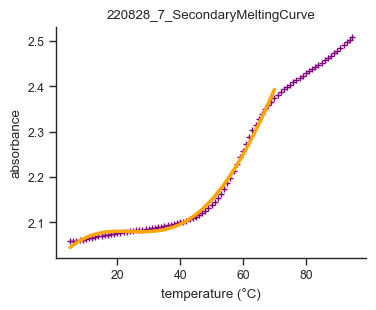

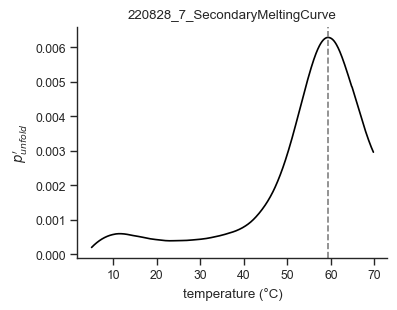

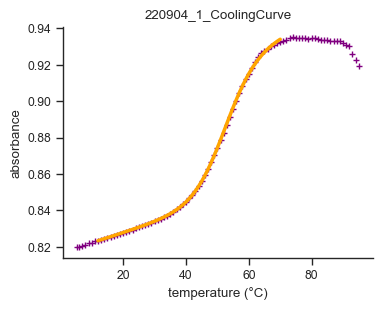

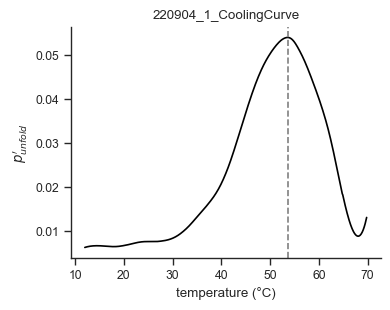

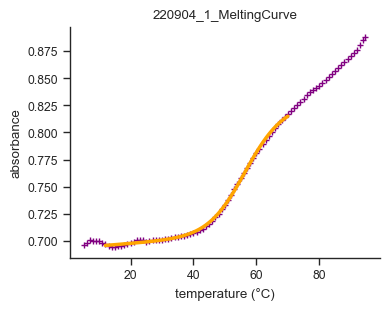

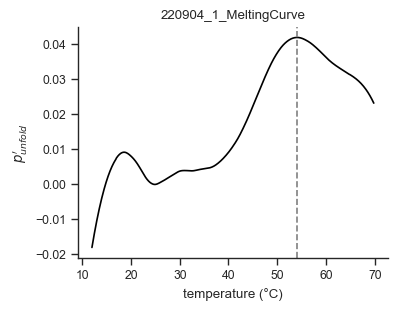

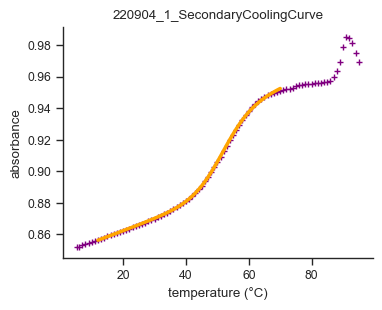

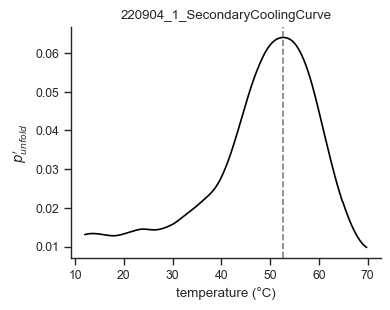

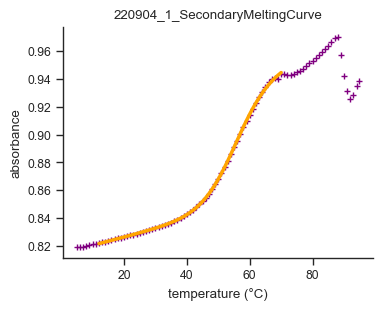

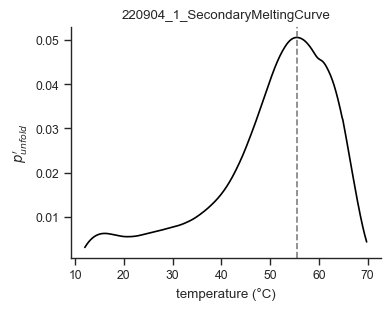

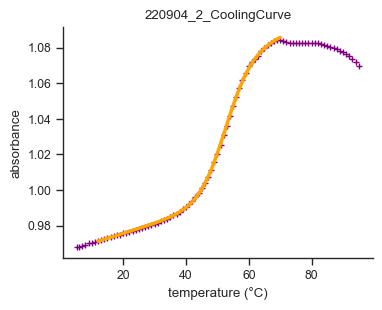

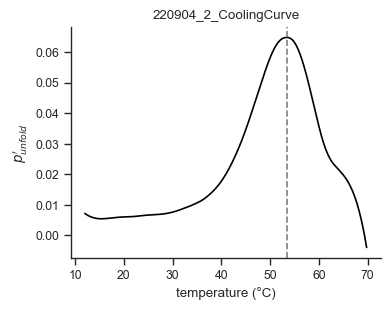

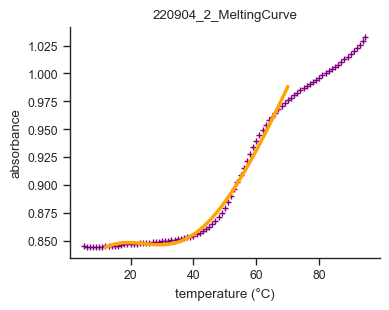

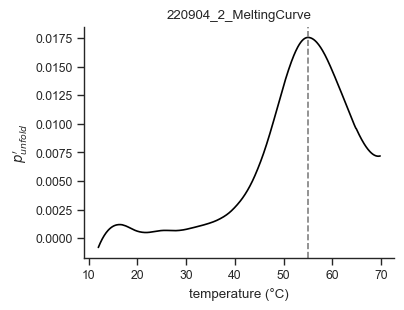

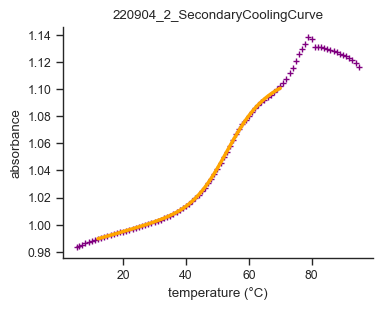

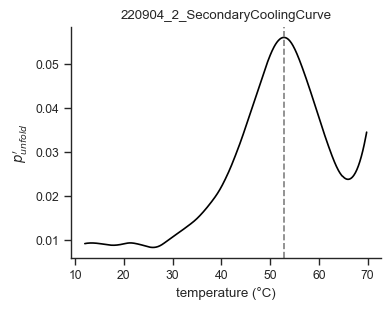

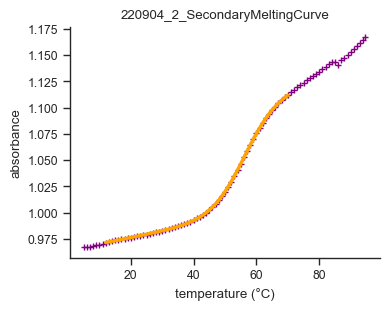

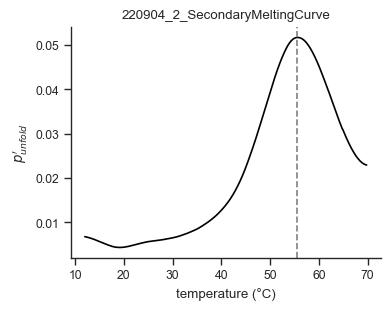

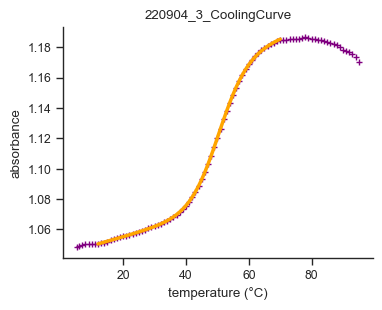

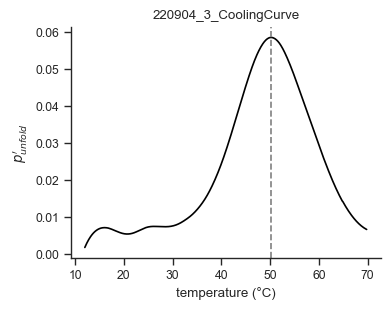

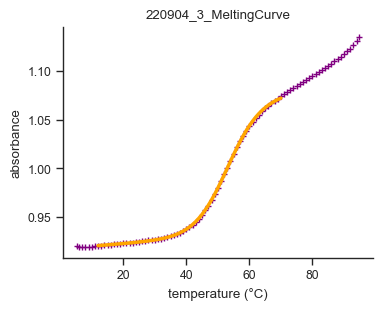

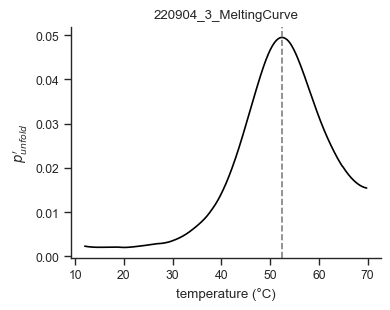

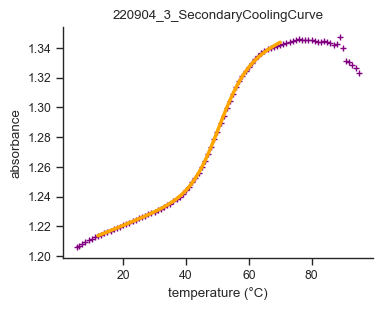

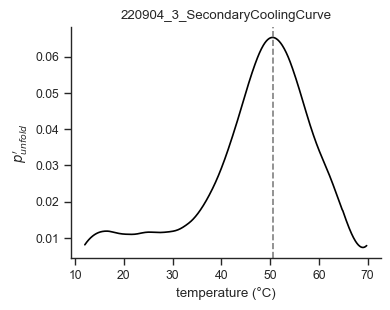

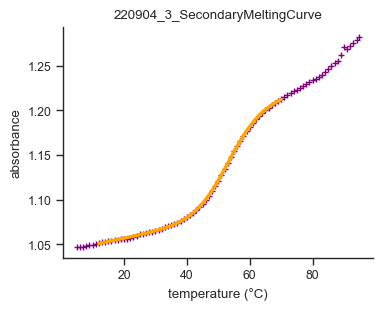

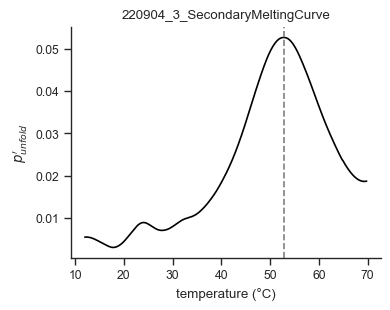

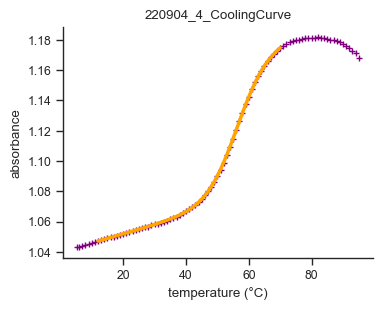

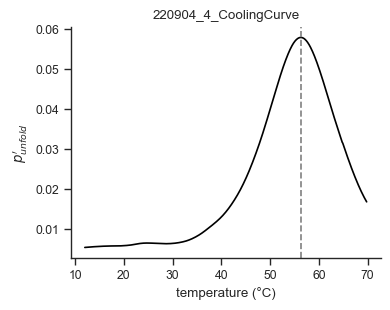

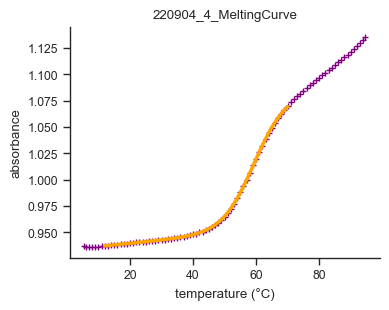

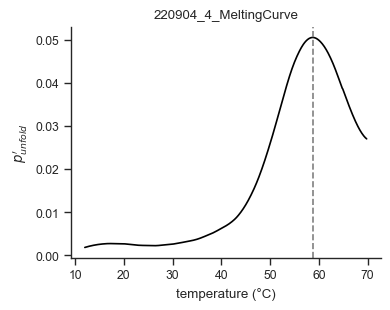

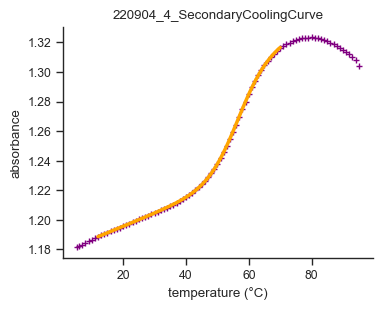

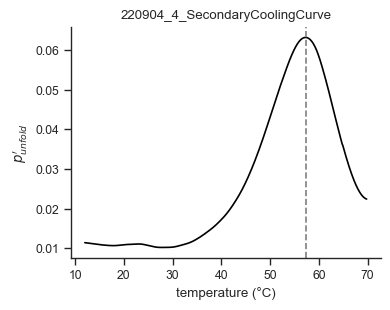

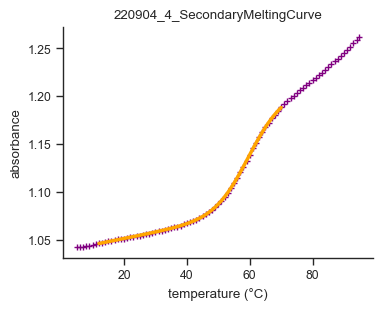

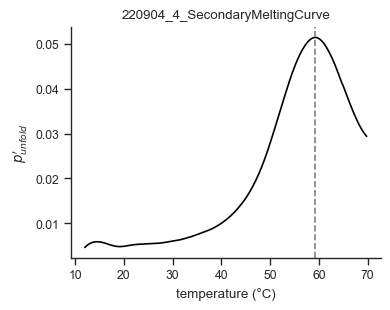

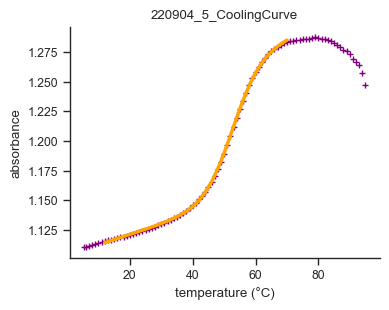

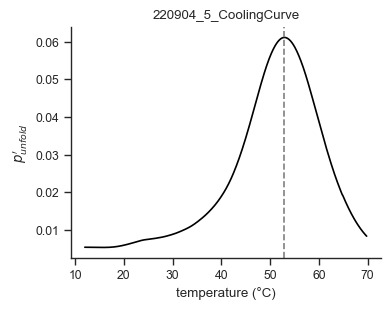

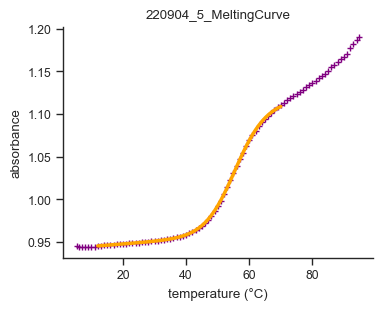

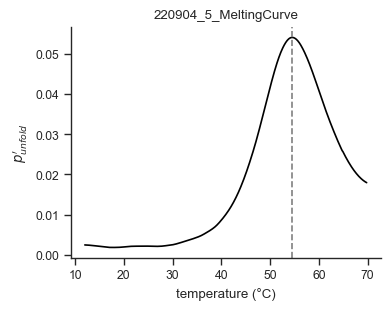

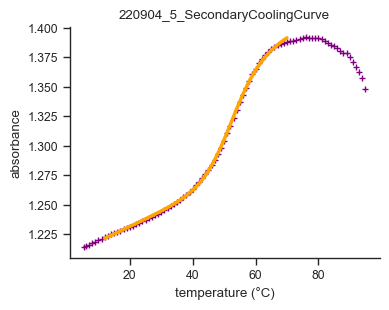

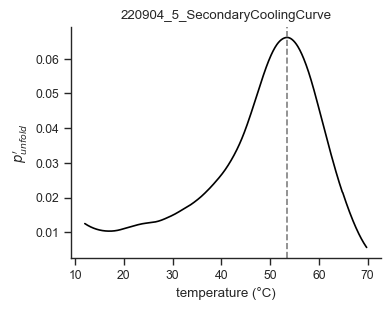

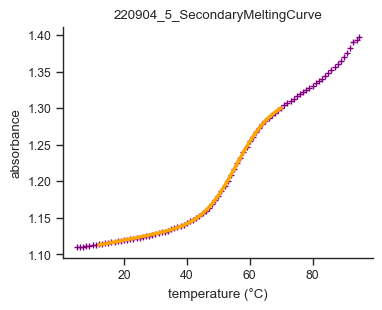

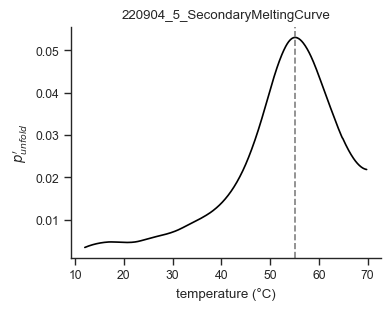

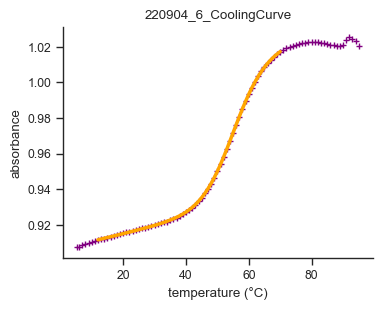

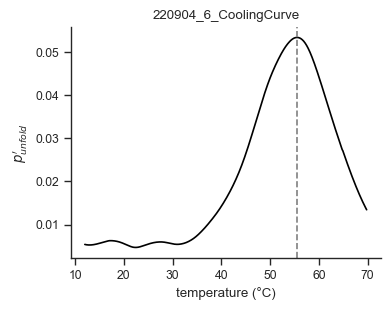

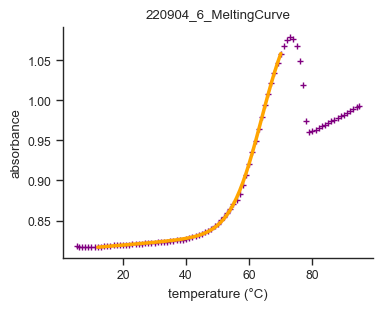

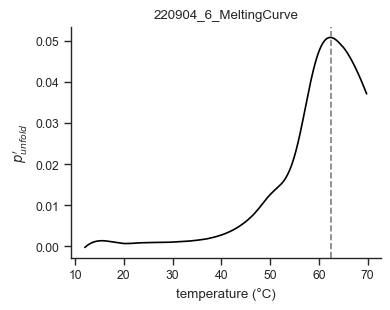

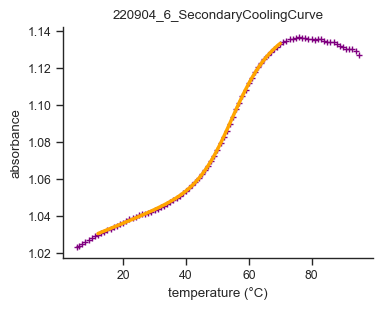

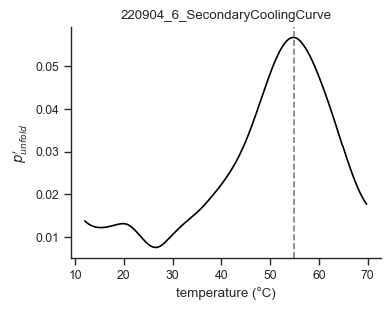

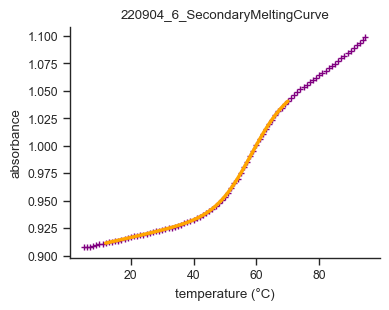

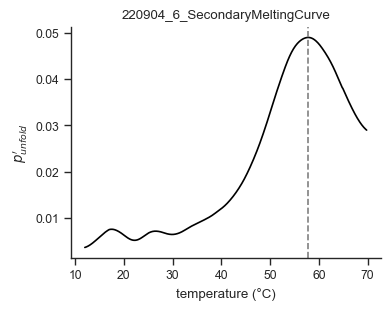

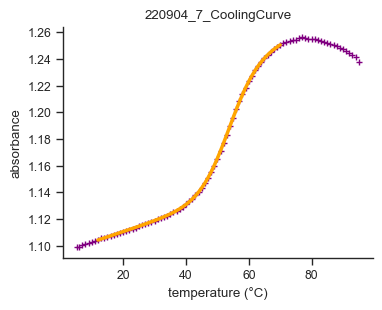

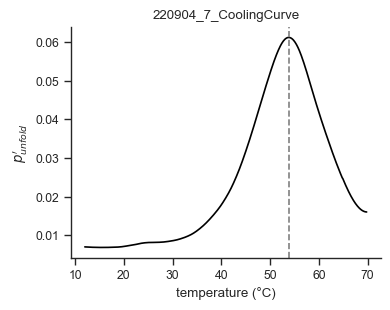

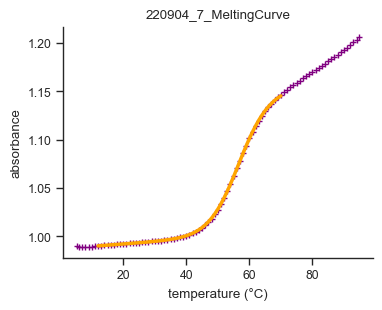

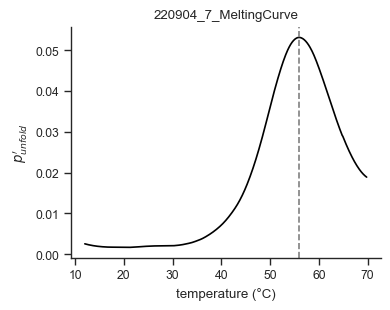

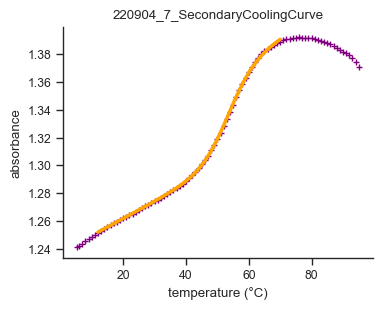

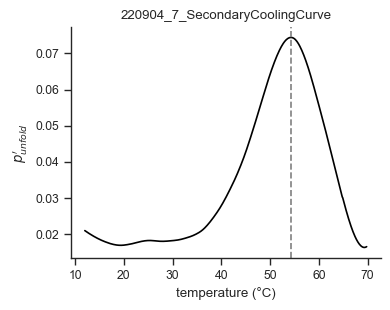

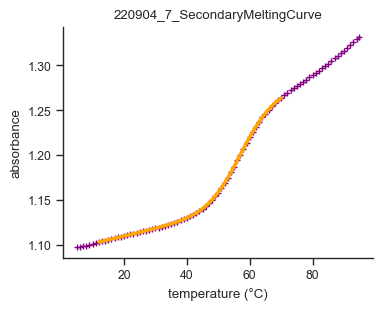

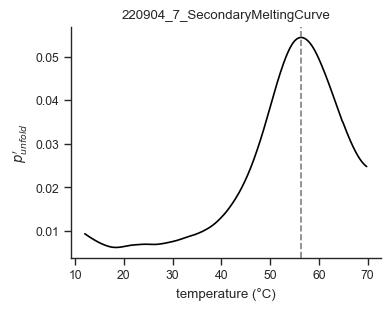

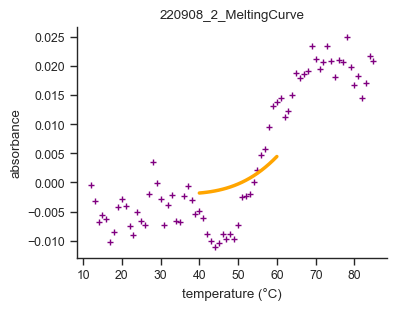

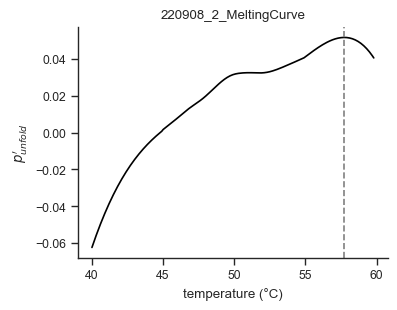

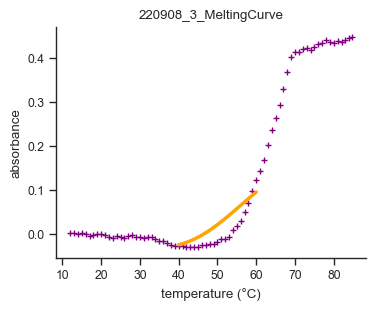

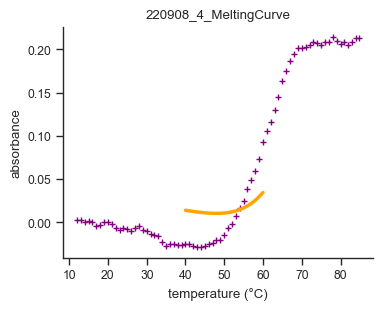

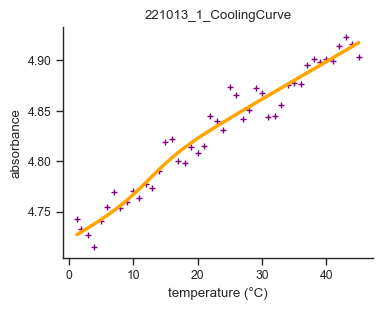

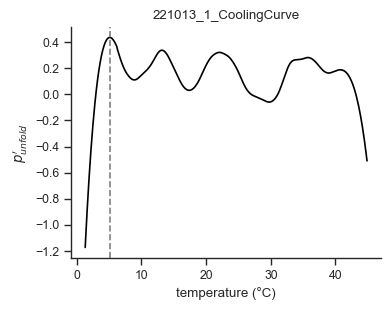

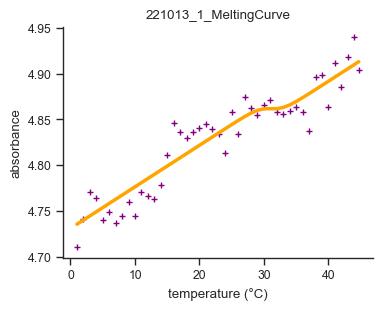

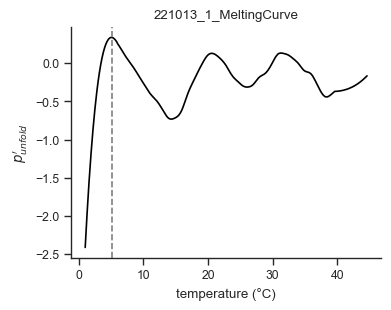

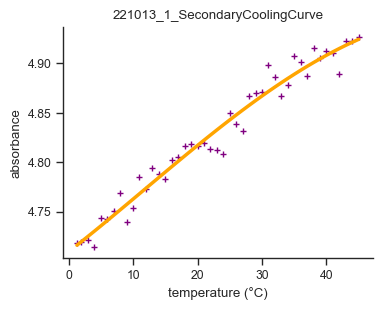

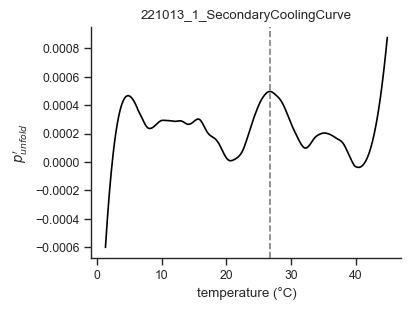

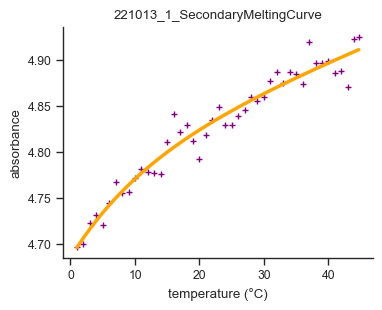

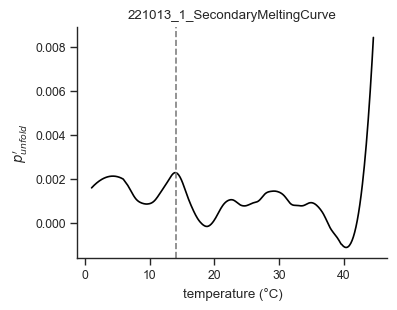

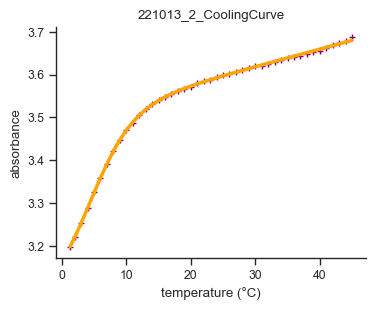

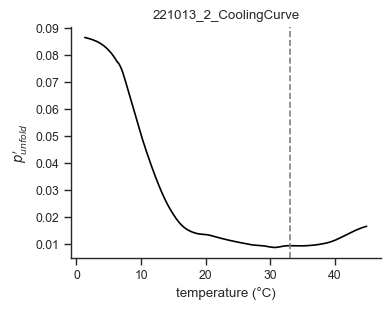

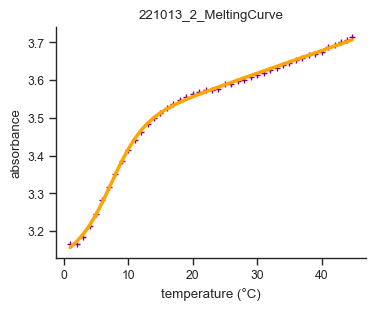

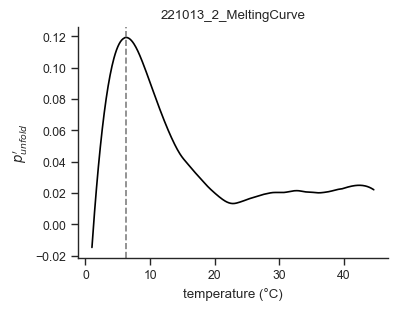

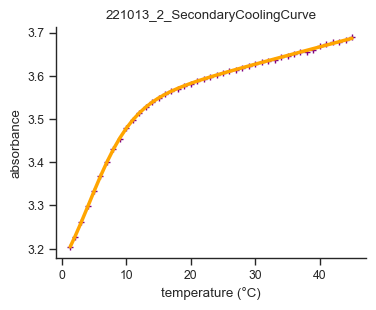

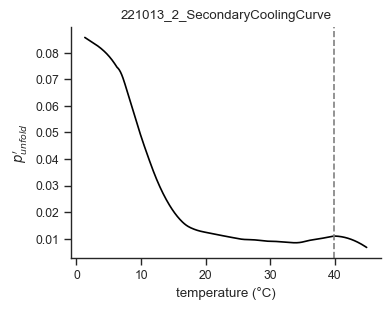

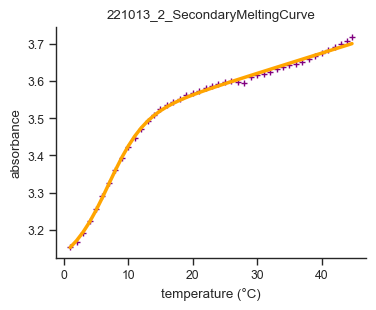

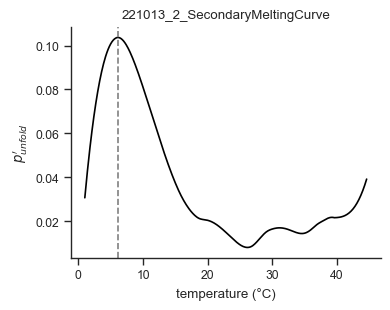

In [23]:
result_columns = ['curve_date', 'curve_num', 'curve_name',
                  'dH_fit', 'dH_fit_std', 'Tm_fit', 'Tm_fit_std', 
                  'fmax_fit', 'fmax_fit_std', 'fmin_fit', 'fmin_fit_std', 
                  'slope_fit', 'slope_fit_std', 'rmse_fit',
                  'Tm_diff', 'dH_diff', 'dS_diff', 'dG_37_diff', 
                  'celsius_min', 'celsius_max']

result_df = pd.DataFrame(index=[parse_curve_name(x)['curve_str'] for x in data_list], columns=result_columns)

for fn in data_list:
    curve_name = parse_curve_name(fn)
    row = sample_df.query("curve_date == '%s' & curve_num == '%s'" % (curve_name['curve_date'], curve_name['curve_num']))
    
    if row.shape[0] == 0:
        print('Cannot find %s in the sample sheet' % curve_name['curve_str'])
    else:
        result_dict = fit_curve(fn, figdir='/mnt/d/data/nnn/fig', 
                                celsius_min=row.at[row.index[0],'celsius_min'],
                                celsius_max=row.at[row.index[0],'celsius_max'])

        result_df.loc[curve_name['curve_str'], :] = result_dict
result_df.to_csv('/mnt/d/data/nnn/uvmelt.csv')

In [24]:
result_df

curve_date curve_num             curve_name  \
220526_1_CoolingCurve              220526         1           CoolingCurve   
220526_1_MeltingCurve              220526         1           MeltingCurve   
220526_1_SecondaryCoolingCurve        NaN       NaN                    NaN   
220526_1_SecondaryMeltingCurve        NaN       NaN                    NaN   
220526_2_CoolingCurve              220526         2           CoolingCurve   
...                                   ...       ...                    ...   
221013_1_SecondaryMeltingCurve     221013         1  SecondaryMeltingCurve   
221013_2_CoolingCurve              221013         2           CoolingCurve   
221013_2_MeltingCurve              221013         2           MeltingCurve   
221013_2_SecondaryCoolingCurve     221013         2  SecondaryCoolingCurve   
221013_2_SecondaryMeltingCurve     221013         2  SecondaryMeltingCurve   

                                   dH_fit dH_fit_std     Tm_fit Tm_fit_std  \
220526_1_CoolingCurve          -30.368464   0.677797  27.014892   0.065784   
220526_1_MeltingCurve           -20.95981   1.268992   29.68249   0.173584   
220526_1_SecondaryCoolingCurve        NaN        NaN        NaN        NaN   
220526_1_SecondaryMeltingCurve        NaN        NaN        NaN        NaN   
220526_2_CoolingCurve          -32.389535   1.753739  18.612662    0.23501   
...                                   ...        ...        ...        ...   
221013_1_SecondaryMeltingCurve -12.084602   6.644692 -39.609159  22.064199   
221013_2_CoolingCurve          -47.124508   1.102121   4.545695   0.154992   
221013_2_MeltingCurve          -63.302949   2.536003   7.442029   0.119855   
221013_2_SecondaryCoolingCurve -45.842552   0.604777    4.38027   0.092717   
221013_2_SecondaryMeltingCurve -57.109782   3.098511   7.021938   0.192687   

                                fmax_fit fmax_fit_std  fmin_fit fmin_fit_std  \
220526_1_CoolingCurve           0.309977     0.000802  0.280776     0.000083   
220526_1_MeltingCurve           0.330802     0.005812  0.274305     0.000301   
220526_1_SecondaryCoolingCurve       NaN          NaN       NaN          NaN   
220526_1_SecondaryMeltingCurve       NaN          NaN       NaN          NaN   
220526_2_CoolingCurve           0.134697     0.000298  0.125953     0.000156   
...                                  ...          ...       ...          ...   
221013_1_SecondaryMeltingCurve  4.792584     0.048059       0.0    25.268712   
221013_2_CoolingCurve           3.495693      0.00171  3.082689     0.009247   
221013_2_MeltingCurve           3.438357      0.00324  3.130901      0.00533   
221013_2_SecondaryCoolingCurve  3.508281     0.000992    3.0775     0.005694   
221013_2_SecondaryMeltingCurve  3.457543     0.004768  3.114449     0.009472   

                               slope_fit slope_fit_std  rmse_fit Tm_diff  \
220526_1_CoolingCurve           0.000161      0.000014  0.000155    24.1   
220526_1_MeltingCurve          -0.000332      0.000088  0.000325    28.9   
220526_1_SecondaryCoolingCurve       NaN           NaN       NaN     NaN   
220526_1_SecondaryMeltingCurve       NaN           NaN       NaN     NaN   
220526_2_CoolingCurve           0.000106      0.000006  0.000144    22.0   
...                                  ...           ...       ...     ...   
221013_1_SecondaryMeltingCurve  0.002759      0.000917  0.008066    14.0   
221013_2_CoolingCurve           0.004088       0.00005  0.001716    33.1   
221013_2_MeltingCurve           0.005992      0.000099  0.003842     6.3   
221013_2_SecondaryCoolingCurve  0.003966      0.000029  0.000967    39.9   
221013_2_SecondaryMeltingCurve  0.005437      0.000143  0.005282     6.1   

                                  dH_diff   dS_diff dG_37_diff celsius_min  \
220526_1_CoolingCurve          -34.119226 -0.114783     1.4807           5   
220526_1_MeltingCurve          -17.820748 -0.058999   0.477895           5   
220526_1_SecondaryCoolingCurve        NaN       N

In [25]:
result_df = result_df.dropna()

In [26]:
for col in ['SEQID', 'conc_uM', 'Na_mM', 'celsius_min', 'celsius_max']:
    result_df[col] = lookup_sample_df(result_df, sample_df, col)

In [28]:
result_df['dH_ae'] = np.abs(result_df.dH_diff - result_df.dH_fit)
result_df['Tm_ae'] = np.abs(result_df.Tm_diff - result_df.Tm_fit)
result_df['dH'] = (result_df.dH_fit + result_df.dH_diff) * 0.5
result_df['Tm'] = (result_df.Tm_fit + result_df.Tm_diff) * 0.5
qc_query = 'dH_ae < 25 & Tm_ae < 10 & rmse_fit < 0.02'
result_df['pass_qc'] = result_df.eval(qc_query)

In [29]:
result_df.to_csv('/mnt/d/data/nnn/UVMeltFitResult.csv')

## QC UV melting results

In [7]:
result_df = pd.read_csv('/mnt/d/data/nnn/UVMeltFitResult.csv', index_col=0)

<AxesSubplot: xlabel='rmse_fit', ylabel='Density'>

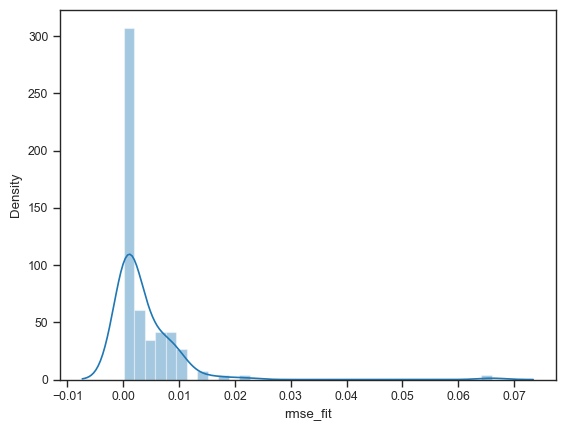

In [38]:
sns.distplot(result_df.rmse_fit)

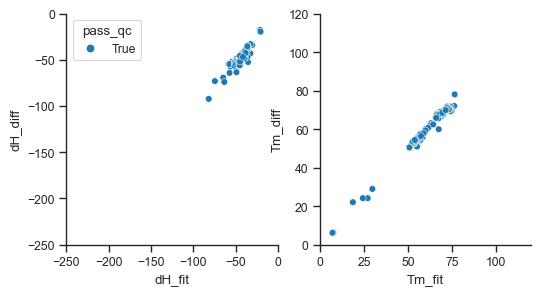

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(6,3))
sns.scatterplot(data=result_df, x='dH_fit', y='dH_diff', hue='pass_qc', ax=ax[0])
lim = (-250, 0)
ax[0].set_xlim(lim)
ax[0].set_ylim(lim)
sns.scatterplot(data=result_df, x='Tm_fit', y='Tm_diff', hue='pass_qc', ax=ax[1])
lim = (0, 120)
ax[1].set_xlim(lim)
ax[1].set_ylim(lim)
ax[1].get_legend().remove()
sns.despine()

In [31]:
result_df.query('pass_qc').to_csv('/mnt/d/data/nnn/UVMeltFitResultClean.csv')

## Comparing with data and NUPACK

In [44]:
arr = pd.read_csv('/mnt/d/data/nnn/arr.csv').set_index('SEQID')
result_df = pd.read_csv('/mnt/d/data/nnn/UVMeltFitResultClean.csv', index_col=0).set_index('SEQID')

In [46]:
df = result_df.join(arr, lsuffix='_uv')

In [72]:
df['dG_37_uv'] = util.get_dG(df['dH_uv'], df['Tm_uv'], celsius=37)

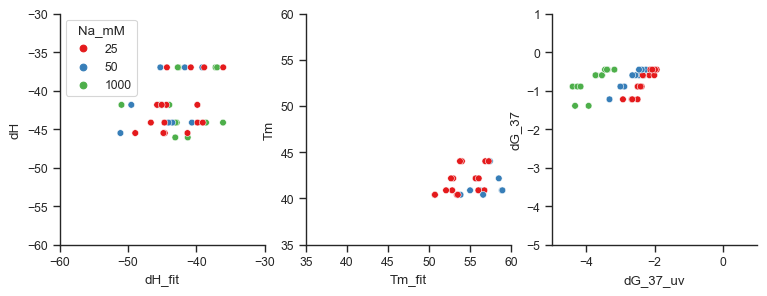

In [78]:
plot_query = 'pass_qc'#'Na_mM <=50'
kwargs = dict(palette='Set1')
fig, ax = plt.subplots(1, 3, figsize=(9,3))
sns.scatterplot(data=df.query(plot_query), x='dH_fit', y='dH', hue='Na_mM', 
                ax=ax[0], **kwargs)
lim = (-60, -30)
ax[0].set_xlim(lim)
ax[0].set_ylim(lim)
sns.scatterplot(data=df.query(plot_query), x='Tm_fit', y='Tm', hue='Na_mM', 
                ax=ax[1], **kwargs)
lim = (35, 60)
ax[1].set_xlim(lim)
ax[1].set_ylim(lim)
ax[1].get_legend().remove()

sns.scatterplot(data=df.query(plot_query), x='dG_37_uv', y='dG_37', hue='Na_mM', 
                ax=ax[2], **kwargs)
lim = (-5, 1)
ax[2].set_xlim(lim)
ax[2].set_ylim(lim)
ax[2].get_legend().remove()

sns.despine()

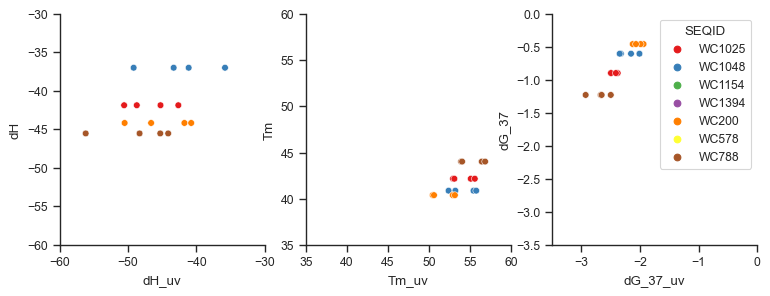

In [103]:
plot_query = 'Na_mM == 25 & SEQID != "WC1025_stem"'
#df = df.reset_index()
kwargs = dict(palette='Set1', hue='SEQID')

fig, ax = plt.subplots(1, 3, figsize=(9,3))
sns.scatterplot(data=df.query(plot_query), x='dH_uv', y='dH', 
                ax=ax[0], **kwargs)
lim = (-60, -30)
ax[0].set_xlim(lim)
ax[0].set_ylim(lim)
sns.scatterplot(data=df.query(plot_query), x='Tm_uv', y='Tm',
                ax=ax[1], **kwargs)
ax[0].get_legend().remove()

lim = (35, 60)
ax[1].set_xlim(lim)
ax[1].set_ylim(lim)
ax[1].get_legend().remove()

sns.scatterplot(data=df.query(plot_query), x='dG_37_uv', y='dG_37',
                ax=ax[2], **kwargs)
lim = (-3.5, 0)
ax[2].set_xlim(lim)
ax[2].set_ylim(lim)
#ax[2].get_legend().remove()

sns.despine()

In [100]:
pd.DataFrame(df.query(plot_query).groupby('SEQID')['dG_37_uv'].apply(np.median)).join(arr).dropna()

dG_37_uv         dH     dH_se      dH_lb      dH_ub         Tm  \
SEQID                                                                    
WC1025 -2.453097 -41.858967  3.899952 -59.199757 -33.050373  42.163017   
WC200  -2.028318 -44.162427  3.288688 -56.793732 -34.370951  40.386292   
WC788  -2.662239 -45.520434  3.318876 -61.127761 -36.475391  44.020412   

           Tm_se      Tm_lb      Tm_ub     dG_37  ...        TargetStruct  \
SEQID                                             ...                       
WC1025  0.331365  41.426184  43.184871 -0.895985  ...  (((((((....)))))))   
WC200   0.321012  39.477518  41.483842 -0.456792  ...  (((((((....)))))))   
WC788   0.335597  43.072800  45.017303 -1.227618  ...  (((((((....)))))))   

        dG_37_NUPACK  dG_37_ensemble_150mM_NUPACK  dG_37_ensemble_75mM_NUPACK  \
SEQID                                                                           
WC1025         -5.49                    -4.279450                   -3.782580   
WC200          -5.48                    -4.719557                   -4.265362   
WC788          -5.79                    -4.856656                   -4.406460   

               GC  Tm_NUPACK_salt_corrected  dG_37_NUPACK_salt_corrected  \
SEQID                                                                      
WC1025  27.777778                 59.035799                    -3.555597   
WC200   38.888889                 61.525724                    -3.766698   
WC788   38.888889                 63.123424                    -4.062929   

        dH_NUPACK_salt_corrected  dS_NUPACK_salt_corrected  scaffold  
SEQID                                                                 
WC1025                     -53.6                 -0.155118     GC_GC  
WC200                      -51.4                 -0.148057     GC_GC  
WC788                      -52.3                 -0.149960     GC_GC  

[3 rows x 47 columns]

<AxesSubplot: xlabel='SEQID', ylabel='dG_37_uv'>

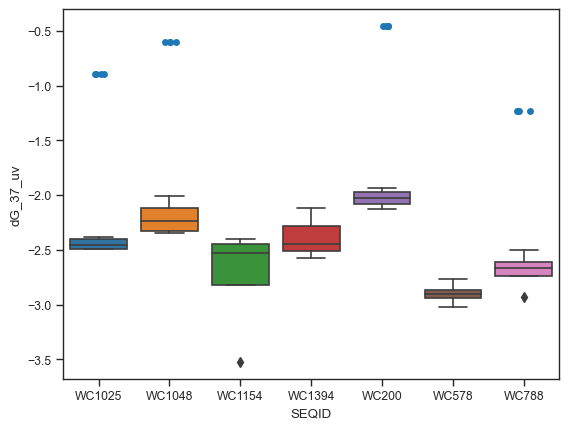

In [93]:
sns.boxplot(data=df.query(plot_query), x='SEQID', y='dG_37_uv')
sns.stripplot(data=df.query(plot_query), x='SEQID', y='dG_37')

In [89]:
df.query(plot_query)

level_0  index   SEQID  curve_date  curve_num             curve_name  \
9          9      9  WC1025      220904          5           CoolingCurve   
10        10     10  WC1025      220904          5           MeltingCurve   
11        11     11  WC1025      220904          5  SecondaryCoolingCurve   
12        12     12  WC1025      220904          5  SecondaryMeltingCurve   
23        23     23  WC1048      220904          1           CoolingCurve   
24        24     24  WC1048      220904          1           MeltingCurve   
25        25     25  WC1048      220904          1  SecondaryCoolingCurve   
26        26     26  WC1048      220904          1  SecondaryMeltingCurve   
35        35     35  WC1154      220904          6           CoolingCurve   
36        36     36  WC1154      220904          6           MeltingCurve   
37        37     37  WC1154      220904          6  SecondaryCoolingCurve   
38        38     38  WC1154      220904          6  SecondaryMeltingCurve   
42        42     42  WC1394      220904          2           CoolingCurve   
43        43     43  WC1394      220904          2  SecondaryCoolingCurve   
44        44     44  WC1394      220904          2  SecondaryMeltingCurve   
52        52     52   WC200      220904          3           CoolingCurve   
53        53     53   WC200      220904          3           MeltingCurve   
54        54     54   WC200      220904          3  SecondaryCoolingCurve   
55        55     55   WC200      220904          3  SecondaryMeltingCurve   
71        71     71   WC578      220904          4           CoolingCurve   
72        72     72   WC578      220904          4           MeltingCurve   
73        73     73   WC578      220904          4  SecondaryCoolingCurve   
74        74     74   WC578      220904          4  SecondaryMeltingCurve   
103      103    103   WC788      220904          7           CoolingCurve   
104      104    104   WC788      220904          7           MeltingCurve   
105      105    105   WC788      220904          7  SecondaryCoolingCurve   
106      106    106   WC788      220904          7  SecondaryMeltingCurve   

        dH_fit  dH_fit_std     Tm_fit  Tm_fit_std  ...  dG_37_NUPACK  \
9   -45.759394    0.537302  52.953001    0.046012  ...         -5.49   
10  -44.403627    0.389582  55.685769    0.040584  ...         -5.49   
11  -45.085002    1.188233  52.687029    0.103094  ...         -5.49   
12  -39.873645    0.406706  56.068137    0.053687  ...         -5.49   
23  -40.827316    0.615290  52.829400    0.063573  ...         -4.22   
24  -36.091999    1.175814  56.753076    0.199667  ...         -4.22   
25  -44.325681    0.884361  52.079360    0.076726  ...         -4.22   
26  -38.870965    0.587925  56.015495    0.081304  ...         -4.22   
35  -41.924591    0.243962  55.322234    0.027775  ...           NaN   
36  -44.691223    0.710558  64.196097    0.155349  ...           NaN   
37  -39.448565    0.597795  54.967644    0.074681  ...           NaN   
38  -38.025283    0.231367  58.786265    0.041978  ...           NaN   
42  -49.437012    0.541993  52.850790    0.040488  ...           NaN   
43  -38.817279    0.473067  53.331157    0.054857  ...           NaN   
44  -39.957913    0.210831  56.573707    0.028753  ...           NaN   
52  -44.683452    0.263236  50.710328    0.021154  ...         -5.48   
53  -39.843384    0.361371  53.401978    0.040219  ...         -5.48   
54  -46.672025    0.538858  50.728073    0.040498  ...         -5.48   
55  -39.078310    0.396737  53.516218    0.045988  ...         -5.48   
71  -44.030935    0.203651  56.527655    0.022746  ...           NaN   
72  -43.094307    0.218909  59.554729    0.032397  ...           NaN   
73  -44.694634    0.385122  56.855513    0.042644  ...           NaN   
74  -40.331124    0.201897  59.864677    0.035578  ...           NaN   
103 -44.636855    0.204358  54.014854    0.019234  ...         -5.79   
104 -44.835213    0.269722  56.863787    0.02969